# Elongation Train Model
### The function fron "common_functions.ipynb" is called to run the program
### All the charts and figures are saved in "plots\\elongation" folder

# 1. Import Libraries and files

## 1.1 Import Libraries

In [1]:
#Import Libraries
from pymatgen.core.composition import Composition, Element
from pymatgen.core.structure import SiteCollection
from matminer.featurizers.composition.alloy import Miedema, WenAlloys,YangSolidSolution
from matminer.featurizers.composition import ElementFraction
from matminer.featurizers.conversions import StrToComposition
from matminer.utils.data import MixingEnthalpy, DemlData
from matminer.utils import data_files #for importing "Miedema.csv" present inside package of Matminer library
from matplotlib.ticker import MultipleLocator # for minor tick lines
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import matplotlib.pyplot as plt

ef= ElementFraction()
stc = StrToComposition()

In [2]:
name='EL'

### Import midema

In [3]:
# Import csv files "Midema" to calculte input features
elem_prop_data = pd.read_csv('Miedema.csv')
VEC_elements = elem_prop_data.set_index('element')['valence_electrons'].to_dict()
shear_modulus_g = elem_prop_data.set_index('element')['shear_modulus'].to_dict()
bulk_modulus_b = elem_prop_data.set_index('element')['compressibility'].to_dict()

### Load datasets

In [4]:
# Load hardness data and Featurization
df = pd.read_csv('elongation.csv')
path = "elongation_model_files\\"
plot_path = "plots\\elongation"

## 1.2 Featurization

In [5]:
%run common_functions.ipynb
df = featurization(df)

StrToComposition:   0%|          | 0/353 [00:00<?, ?it/s]

ElementFraction:   0%|          | 0/353 [00:00<?, ?it/s]

## 1.3 Informations and Plots on collected datasets

In [6]:
df = df.loc[:, (df != 0).any(axis=0)]
    
cols = list(df.columns.values)    #Make a list of all of the columns in the df
set = df.astype(bool).sum(axis=0) # Extract the occurance of each element in the alloys

element_df = set.to_frame()      # Convert extracted the occurance of each element in dataframe

element_occurancy = element_df[7:]
element_occurancy.columns =['Occurance']
    

In [7]:
df

Alloys  Elongation (%)     Phase  \
0                            Al0.053CuMnNi            45.0       FCC   
1    Al0.108Co0.514Cr0.514Cu0.108Fe0.514Ni            30.0       FCC   
2                             Al0.11CuMnNi            40.0  FCC+Sec.   
3                   Al0.125CoCrCuFeMnNiTiV             1.0   FCC+BCC   
4                          Al0.2CoCrFeMnNi            56.0       FCC   
..                                     ...             ...       ...   
348                     AlCrFeNiMo0.5Ti0.5            10.4  BCC + Im   
349                       Al0.5NbTiV2Zr0.5            16.9  BCC + Im   
350                       Al0.5NbTiV2Zr1.5             5.5  BCC + Im   
351                       Al0.5Nb0.5TiV2Zr             7.3  BCC + Im   
352                    Al0.5Nb0.5TiV2Zr1.5             5.1  BCC + Im   

    Fabrication_type                            DOI  \
0               CAST  10.1016/j.jallcom.2015.07.285   
1            WROUGHT     10.1016/j.msea.2017.04.111   
2               CAST  10.1016/j.jallcom.2015.07.285   
3               CAST     10.1016/j.msea.2006.11.049   
4               CAST  10.1016/j.actamat.2013.09.037   
..               ...                            ...   
348              NaN                            NaN   
349            CAT-A                            NaN   
350            CAT-A                            NaN   
351            CAT-A                            NaN   
352            CAT-A                            NaN   

                                                 Paper  \
0    High entropy brasses and bronzes – Microstruct...   
1                                                  NaN   
2    High entropy brasses and bronzes – Microstruct...   
3    Microstructure and compressive properties of m...   
4    Effects of Al addition on structural evolution...   
..                                                 ...   
348                                                NaN   
349      https://doi.org/10.1016/j.jallcom.2022.166767   
350      https://doi.org/10.1016/j.jallcom.2022.166767   
351      https://doi.org/10.1016/j.jallcom.2022.166767   
352      https://doi.org/10.1016/j.jallcom.2022.166767   

                                            Unnamed: 6 Unnamed: 7  \
0                                                  NaN        NaN   
1                                                  NaN        NaN   
2                                                  NaN        NaN   
3                                                  NaN        NaN   
4                                                  NaN        NaN   
..                                                 ...        ...   
348                                                NaN        NaN   
349  Microstructure and mechanical properties of Al...        NaN   
350  Microstructure and mechanical properties of Al...        NaN   
351  Microstructure and mechanical properties of Al...        NaN   
352  Microstructure and mechanical properties of Al...        NaN   

                             composition  StrToComposition Exceptions   Li  \
0                       (Al, Cu, Mn, Ni)                          NaN  0.0   
1               (Al, Co, Cr, Cu, Fe, Ni)                          NaN  0.0   
2                       (Al, Cu, Mn, Ni)                          NaN  0.0   
3    (Al, Co, Cr, Cu, Fe, Mn, Ni, Ti, V)                          NaN  0.0   
4               (Al, Co, Cr, Fe, Mn, Ni)                          NaN  0.0   
..                                   ...                          ...  ...   
348             (Al, Cr, Fe, Ni, Mo, Ti)                          NaN  0.0   
349                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   
350                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   
351                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   
352                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   

       C   Mg        Al   Si   Ca   Sc        T

In [8]:
%run common_functions.ipynb
df = df_element_number(df)

In [9]:
df

Alloys  Elongation (%)     Phase  \
0                            Al0.053CuMnNi            45.0       FCC   
1    Al0.108Co0.514Cr0.514Cu0.108Fe0.514Ni            30.0       FCC   
2                             Al0.11CuMnNi            40.0  FCC+Sec.   
3                   Al0.125CoCrCuFeMnNiTiV             1.0   FCC+BCC   
4                          Al0.2CoCrFeMnNi            56.0       FCC   
..                                     ...             ...       ...   
348                     AlCrFeNiMo0.5Ti0.5            10.4  BCC + Im   
349                       Al0.5NbTiV2Zr0.5            16.9  BCC + Im   
350                       Al0.5NbTiV2Zr1.5             5.5  BCC + Im   
351                       Al0.5Nb0.5TiV2Zr             7.3  BCC + Im   
352                    Al0.5Nb0.5TiV2Zr1.5             5.1  BCC + Im   

    Fabrication_type                            DOI  \
0               CAST  10.1016/j.jallcom.2015.07.285   
1            WROUGHT     10.1016/j.msea.2017.04.111   
2               CAST  10.1016/j.jallcom.2015.07.285   
3               CAST     10.1016/j.msea.2006.11.049   
4               CAST  10.1016/j.actamat.2013.09.037   
..               ...                            ...   
348              NaN                            NaN   
349            CAT-A                            NaN   
350            CAT-A                            NaN   
351            CAT-A                            NaN   
352            CAT-A                            NaN   

                                                 Paper  \
0    High entropy brasses and bronzes – Microstruct...   
1                                                  NaN   
2    High entropy brasses and bronzes – Microstruct...   
3    Microstructure and compressive properties of m...   
4    Effects of Al addition on structural evolution...   
..                                                 ...   
348                                                NaN   
349      https://doi.org/10.1016/j.jallcom.2022.166767   
350      https://doi.org/10.1016/j.jallcom.2022.166767   
351      https://doi.org/10.1016/j.jallcom.2022.166767   
352      https://doi.org/10.1016/j.jallcom.2022.166767   

                                            Unnamed: 6 Unnamed: 7  \
0                                                  NaN        NaN   
1                                                  NaN        NaN   
2                                                  NaN        NaN   
3                                                  NaN        NaN   
4                                                  NaN        NaN   
..                                                 ...        ...   
348                                                NaN        NaN   
349  Microstructure and mechanical properties of Al...        NaN   
350  Microstructure and mechanical properties of Al...        NaN   
351  Microstructure and mechanical properties of Al...        NaN   
352  Microstructure and mechanical properties of Al...        NaN   

                             composition  StrToComposition Exceptions   Li  \
0                       (Al, Cu, Mn, Ni)                          NaN  0.0   
1               (Al, Co, Cr, Cu, Fe, Ni)                          NaN  0.0   
2                       (Al, Cu, Mn, Ni)                          NaN  0.0   
3    (Al, Co, Cr, Cu, Fe, Mn, Ni, Ti, V)                          NaN  0.0   
4               (Al, Co, Cr, Fe, Mn, Ni)                          NaN  0.0   
..                                   ...                          ...  ...   
348             (Al, Cr, Fe, Ni, Mo, Ti)                          NaN  0.0   
349                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   
350                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   
351                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   
352                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   

       C   Mg        Al   Si   Ca   Sc        T

    Occurrence
Sc           2
Pd           4
Re           5
Ca           5
Y            6
Li          10
Zn          14
Mg          15
C           16
Sn          18
W           25
Si          27
Hf          43
Ta          54
Mn          60
Cu          78
V           88
Zr          89
Mo          93
Nb         137
Co         158
Al         161
Ti         164
Cr         177
Fe         187
Ni         204

 The total number of datasets used for ML model is 353


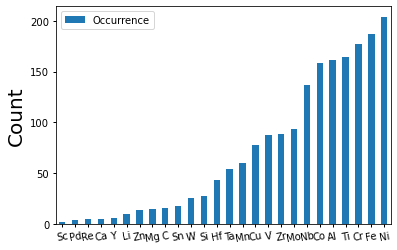

In [10]:
%run common_functions.ipynb
element_occurrence(df,limit_value=10, fig_title='Elongation', fig_name='plots\\elongation\\element_occurrence_before_filter')

## 1.4 Data Filtering

In [11]:
%run common_functions.ipynb
#df = data_elimination(df)

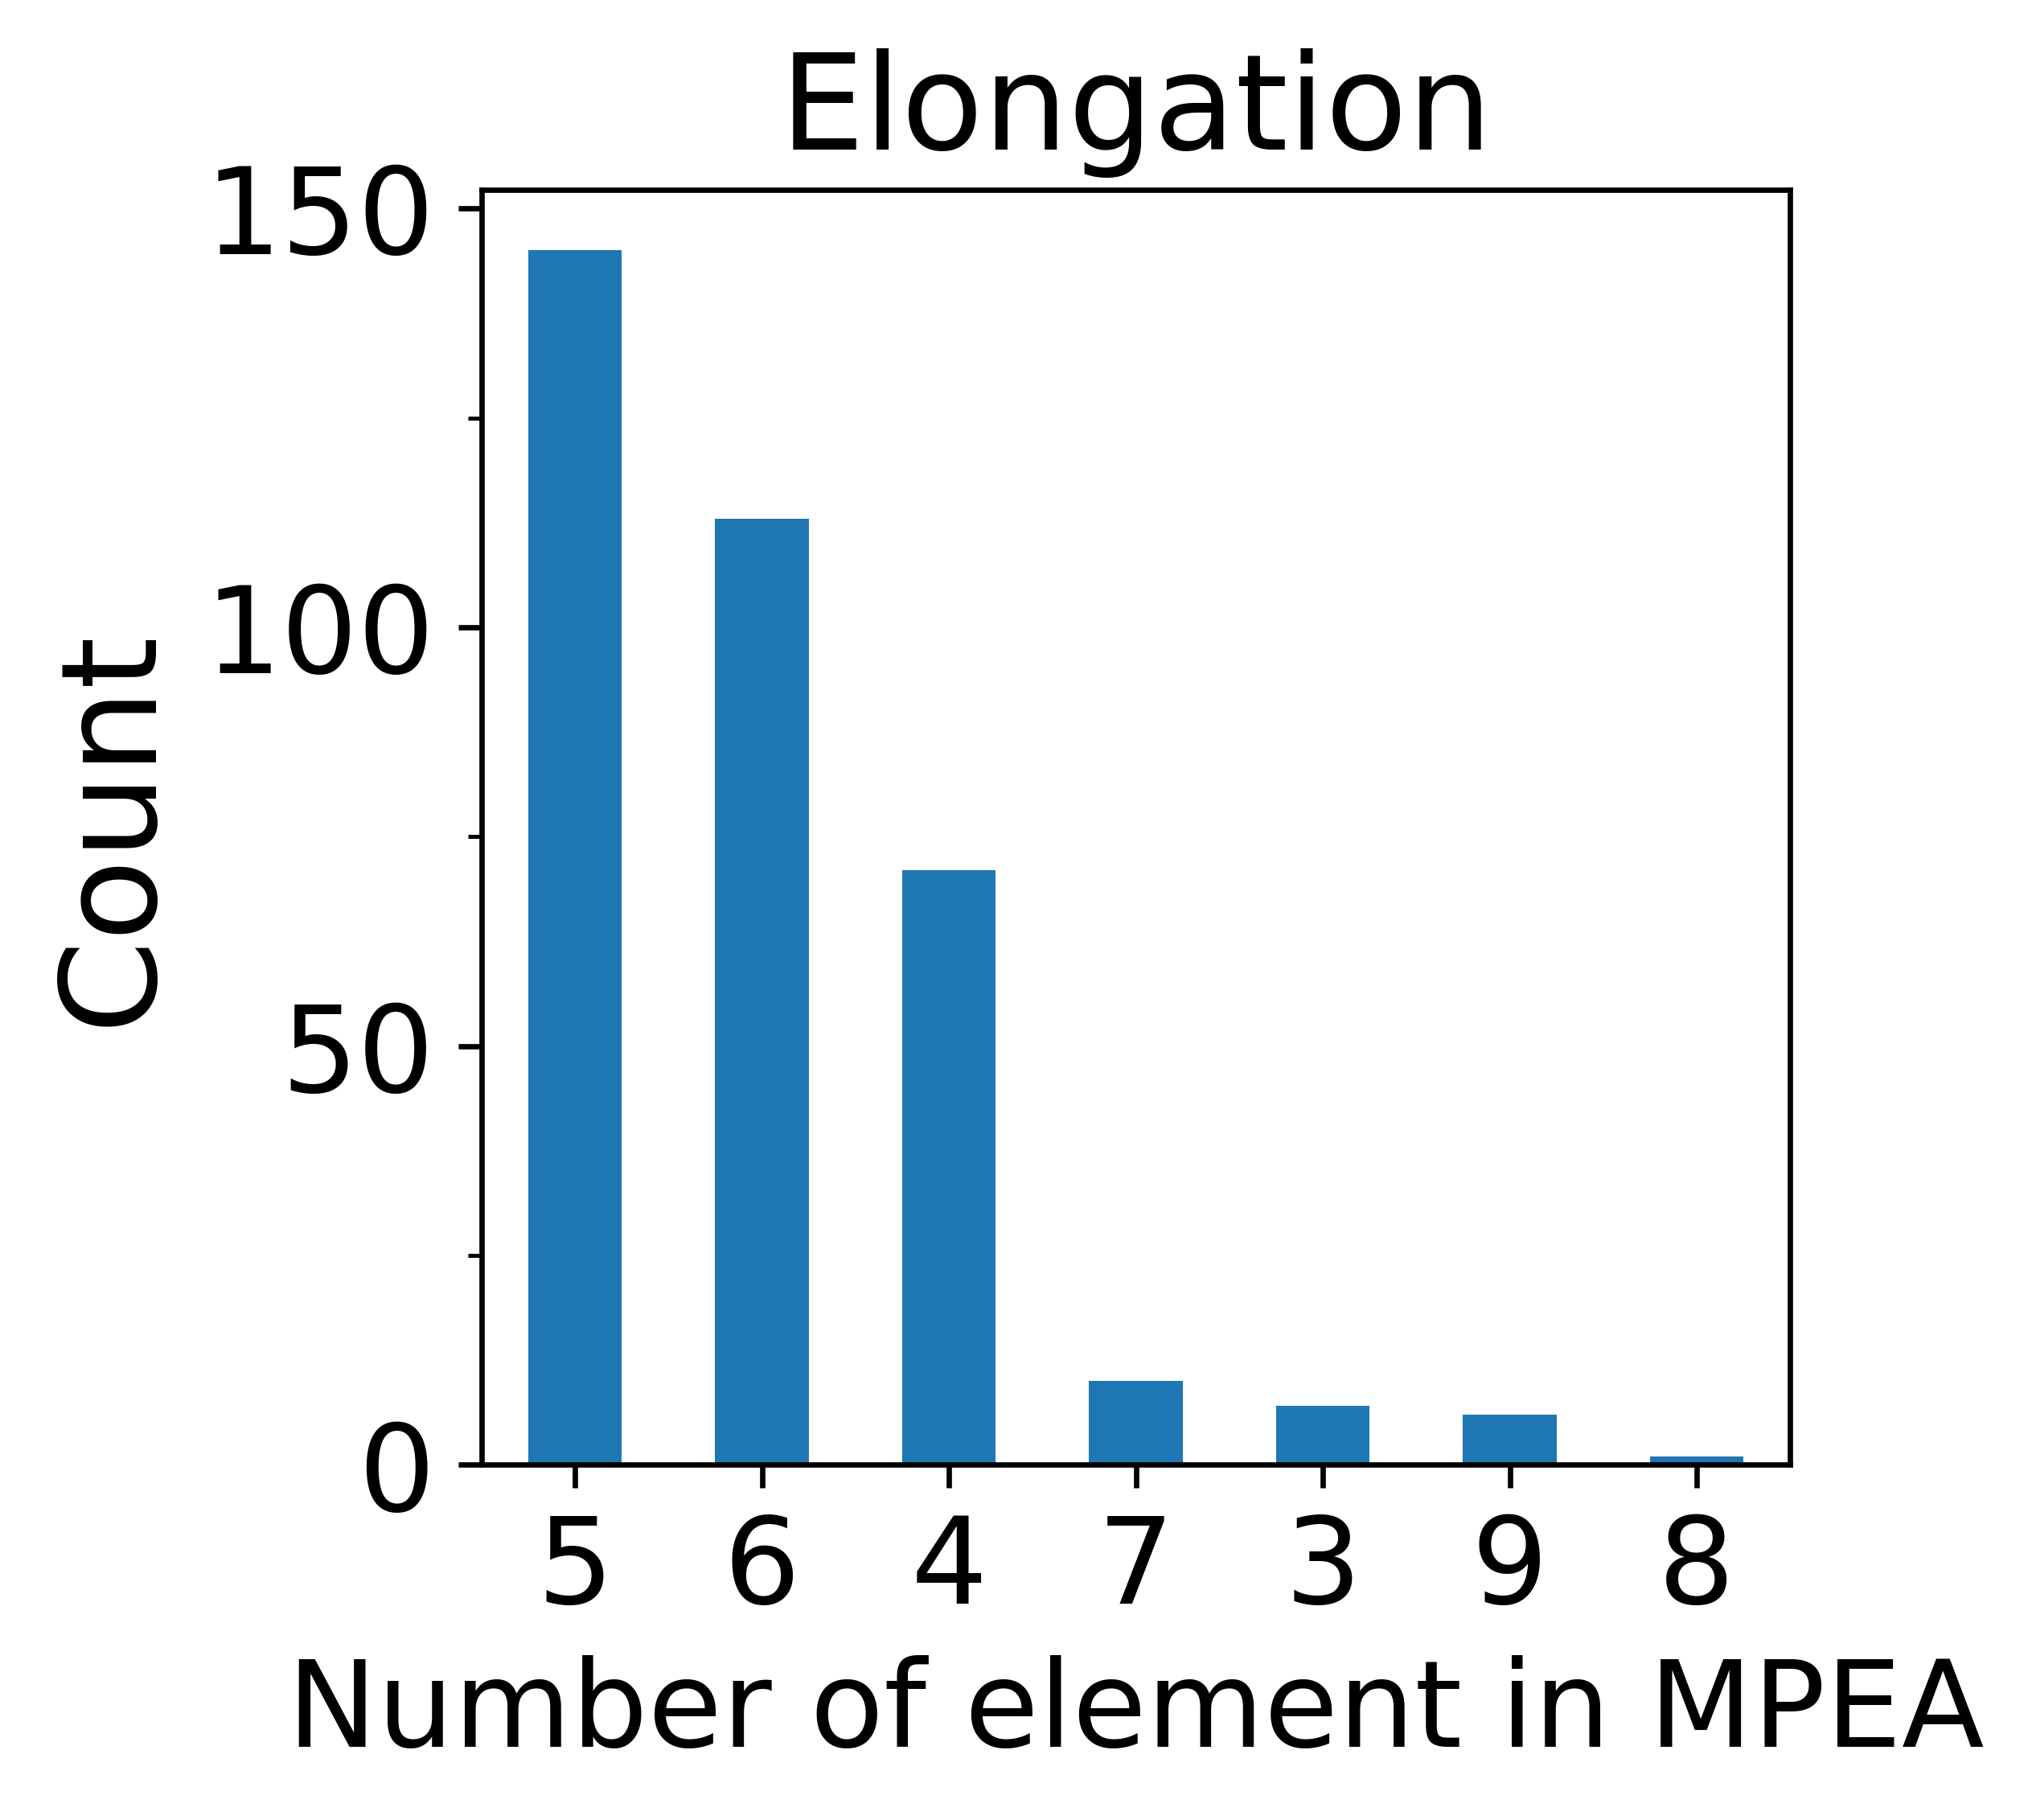

In [12]:
%run common_functions.ipynb
element_number(df, fig_title='Elongation', fig_name='plots\\elongation\\element_number_elongation.png')

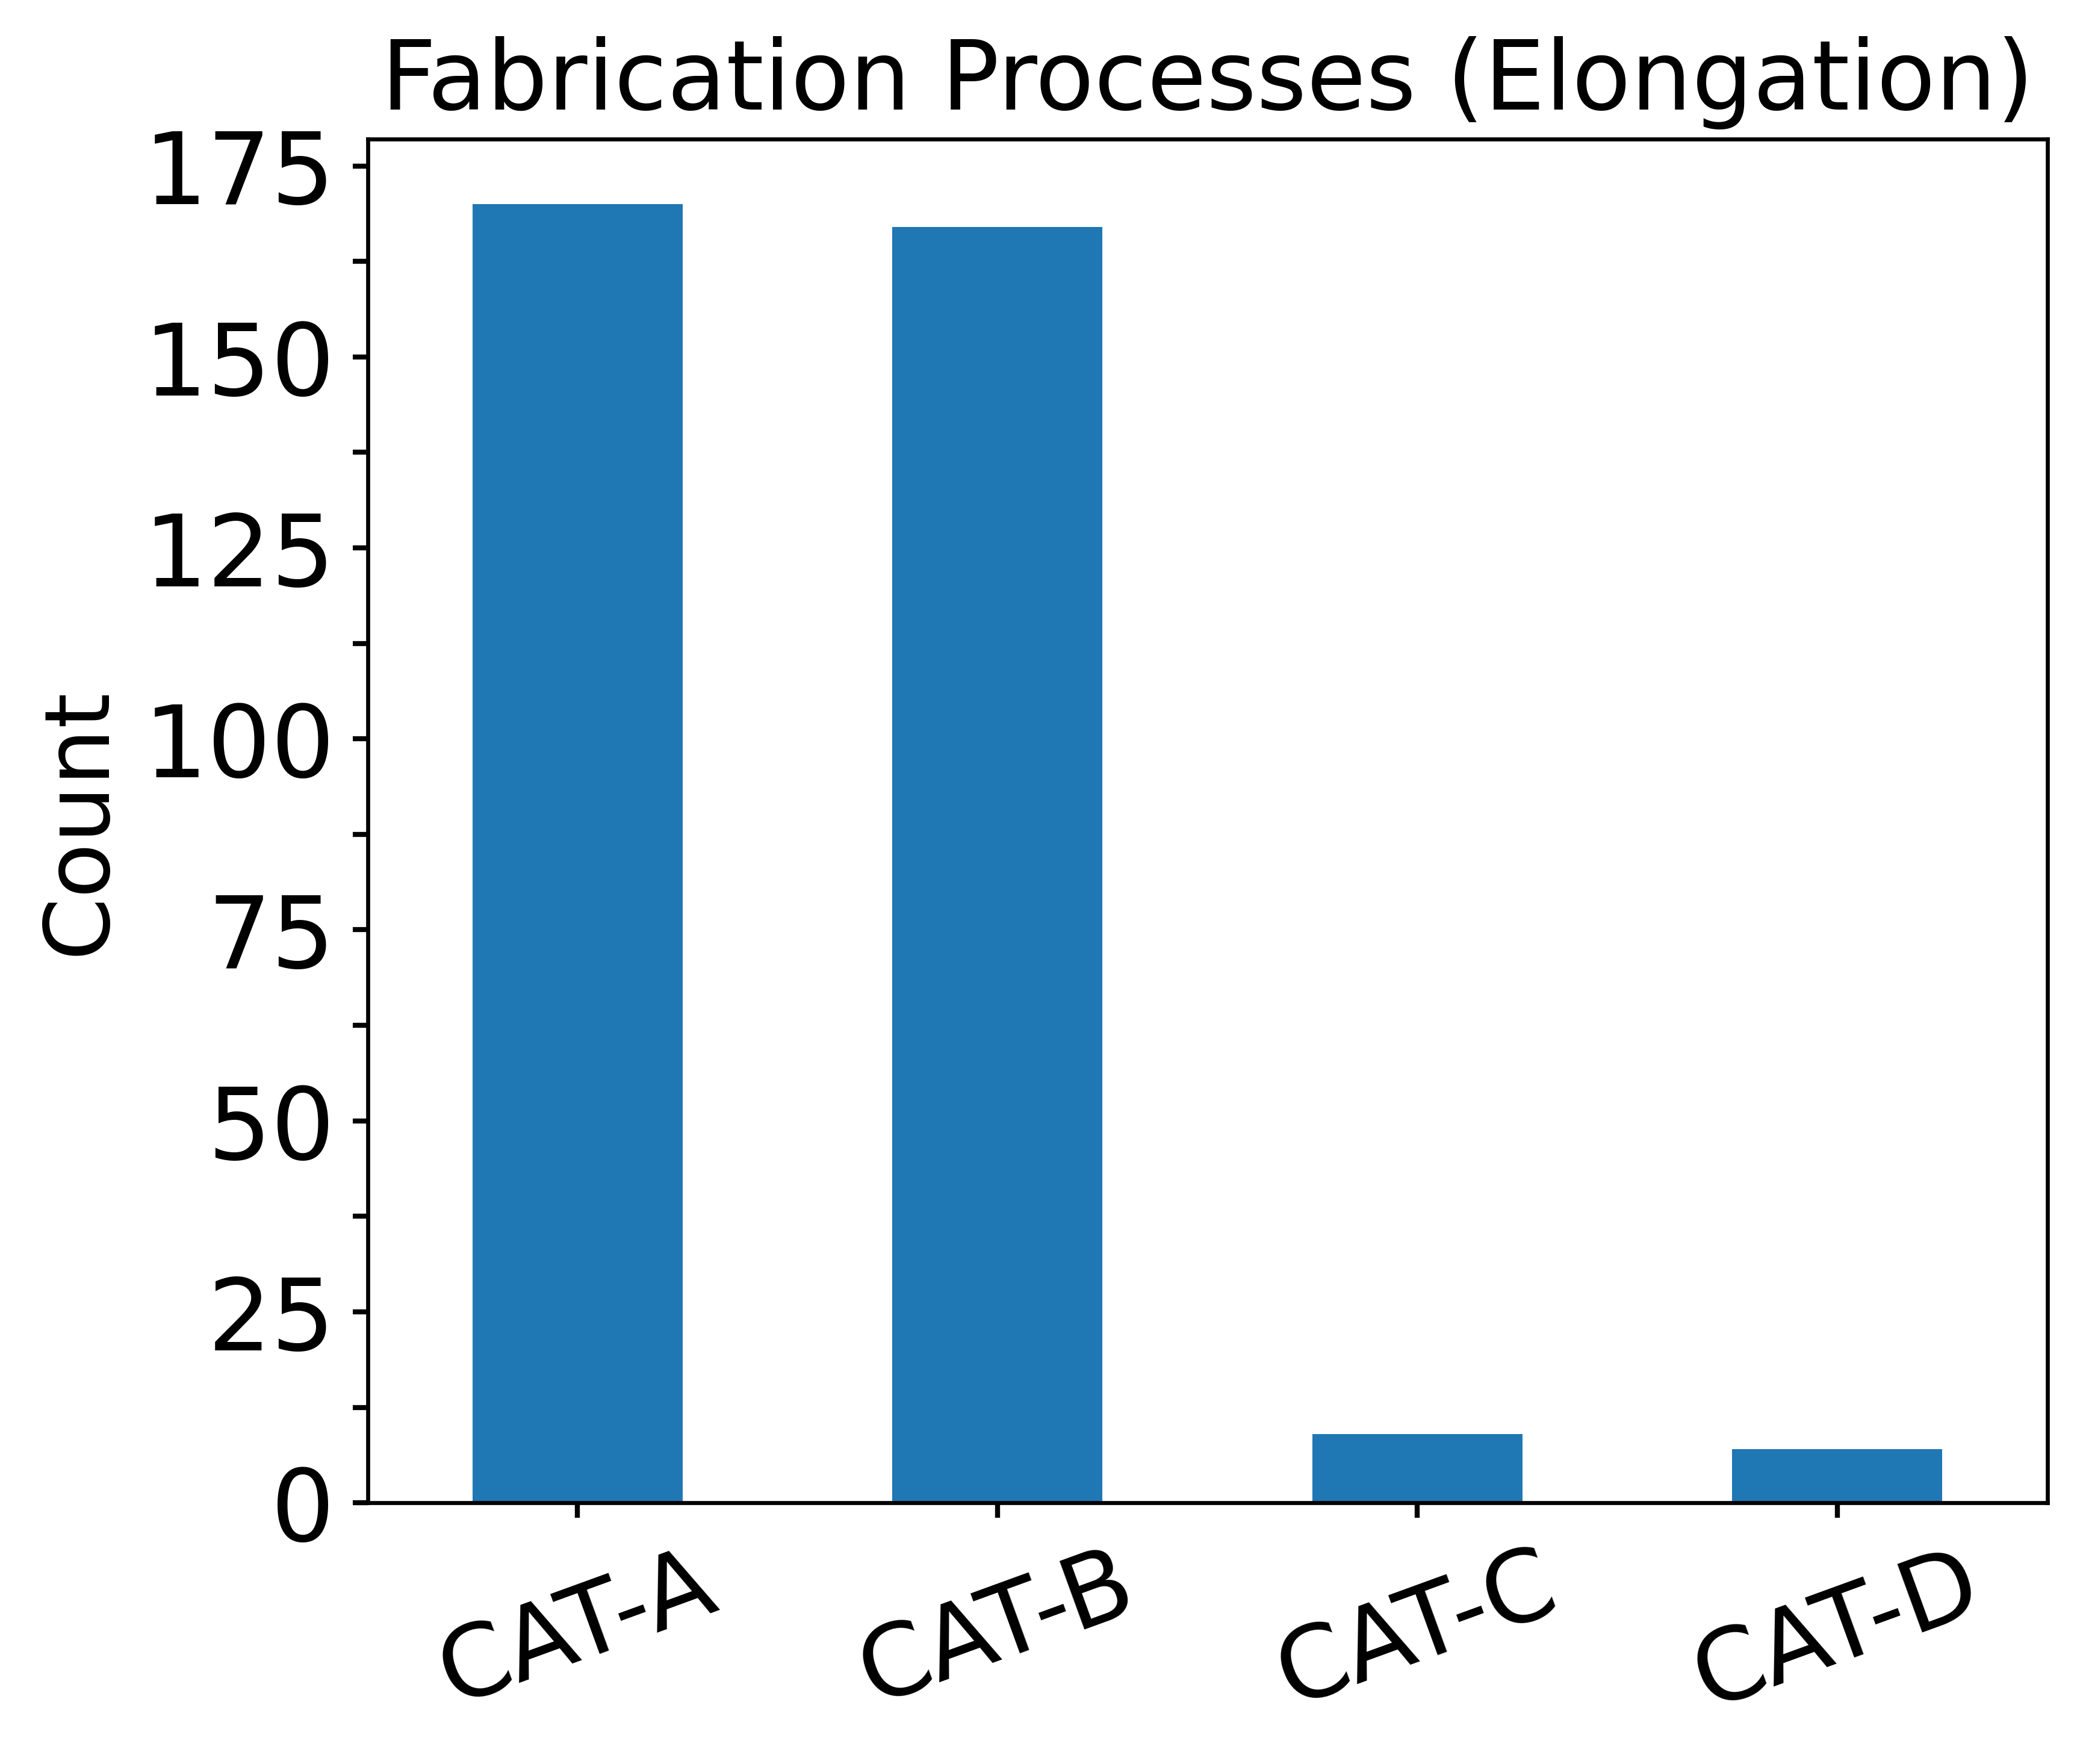

In [13]:
%run common_functions.ipynb
fab_type(df, fig_title='Elongation', fig_name='plots\\elongation\\fab_type_elongation')

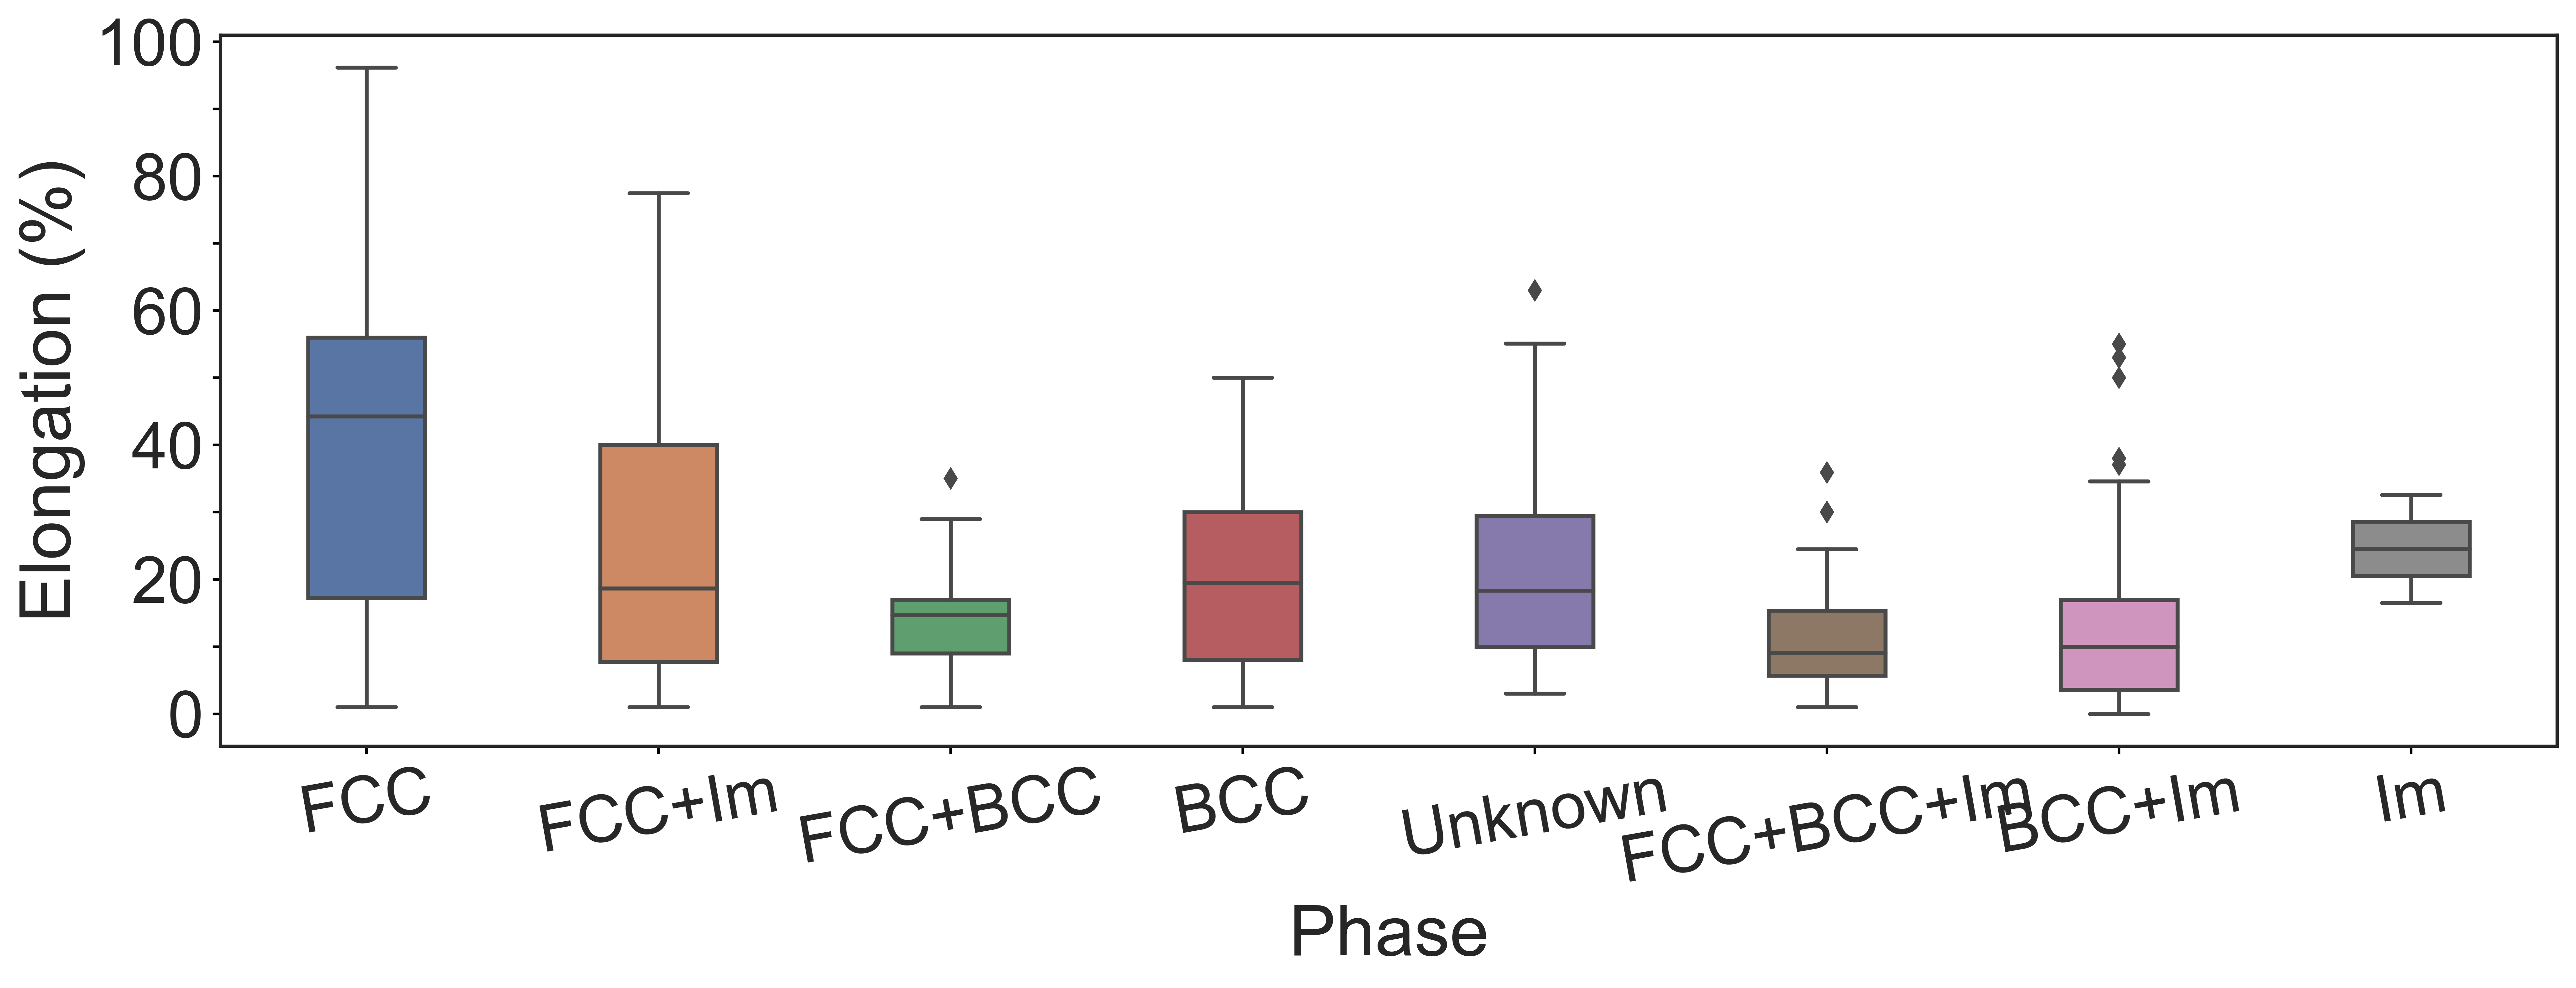

In [14]:
%run common_functions.ipynb
df = phase_rearrange(df)
%run common_functions.ipynb
phase_plot(df, fig_title='Elongation (%)', fig_name='plots\\elongation\\phase_elongation')

    Occurrence
Sc           2
Pd           4
Re           5
Ca           5
Y            6
Li          10
Zn          14
Mg          15
C           16
Sn          18
W           25
Si          27
Hf          43
Ta          54
Mn          60
Cu          78
V           88
Zr          89
Mo          93
Nb         137
Co         158
Al         161
Ti         164
Cr         177
Fe         187
Ni         204

 The total number of datasets used for ML model is 353


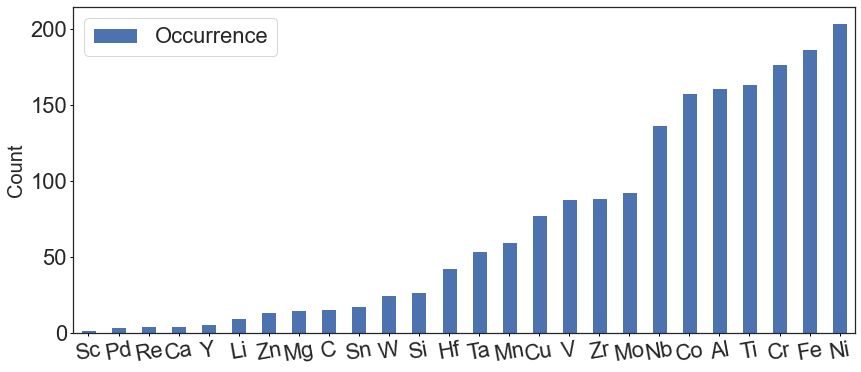

In [15]:
%run common_functions.ipynb
element_occurrence(df,limit_value=10, fig_title='Hardness/ Elongation', fig_name='plots\\elongation\\element_occurrence')

# 2. Input properties calculations

In [16]:

%run common_functions.ipynb
df, df_input_target = properties_calculation(df)

In [17]:
df

Alloys  Elongation (%)    Phase  \
0                            Al0.053CuMnNi            45.0      FCC   
1    Al0.108Co0.514Cr0.514Cu0.108Fe0.514Ni            30.0      FCC   
2                             Al0.11CuMnNi            40.0   FCC+Im   
3                   Al0.125CoCrCuFeMnNiTiV             1.0  FCC+BCC   
4                          Al0.2CoCrFeMnNi            56.0      FCC   
..                                     ...             ...      ...   
348                     AlCrFeNiMo0.5Ti0.5            10.4   BCC+Im   
349                       Al0.5NbTiV2Zr0.5            16.9   BCC+Im   
350                       Al0.5NbTiV2Zr1.5             5.5   BCC+Im   
351                       Al0.5Nb0.5TiV2Zr             7.3   BCC+Im   
352                    Al0.5Nb0.5TiV2Zr1.5             5.1   BCC+Im   

    Fabrication_type                            DOI  \
0              CAT-A  10.1016/j.jallcom.2015.07.285   
1              CAT-B     10.1016/j.msea.2017.04.111   
2              CAT-A  10.1016/j.jallcom.2015.07.285   
3              CAT-A     10.1016/j.msea.2006.11.049   
4              CAT-A  10.1016/j.actamat.2013.09.037   
..               ...                            ...   
348            CAT-B                            NaN   
349            CAT-A                            NaN   
350            CAT-A                            NaN   
351            CAT-A                            NaN   
352            CAT-A                            NaN   

                                                 Paper  \
0    High entropy brasses and bronzes – Microstruct...   
1                                                  NaN   
2    High entropy brasses and bronzes – Microstruct...   
3    Microstructure and compressive properties of m...   
4    Effects of Al addition on structural evolution...   
..                                                 ...   
348                                                NaN   
349      https://doi.org/10.1016/j.jallcom.2022.166767   
350      https://doi.org/10.1016/j.jallcom.2022.166767   
351      https://doi.org/10.1016/j.jallcom.2022.166767   
352      https://doi.org/10.1016/j.jallcom.2022.166767   

                                            Unnamed: 6 Unnamed: 7  \
0                                                  NaN        NaN   
1                                                  NaN        NaN   
2                                                  NaN        NaN   
3                                                  NaN        NaN   
4                                                  NaN        NaN   
..                                                 ...        ...   
348                                                NaN        NaN   
349  Microstructure and mechanical properties of Al...        NaN   
350  Microstructure and mechanical properties of Al...        NaN   
351  Microstructure and mechanical properties of Al...        NaN   
352  Microstructure and mechanical properties of Al...        NaN   

                             composition  StrToComposition Exceptions   Li  \
0                       (Al, Cu, Mn, Ni)                          NaN  0.0   
1               (Al, Co, Cr, Cu, Fe, Ni)                          NaN  0.0   
2                       (Al, Cu, Mn, Ni)                          NaN  0.0   
3    (Al, Co, Cr, Cu, Fe, Mn, Ni, Ti, V)                          NaN  0.0   
4               (Al, Co, Cr, Fe, Mn, Ni)                          NaN  0.0   
..                                   ...                          ...  ...   
348             (Al, Cr, Fe, Ni, Mo, Ti)                          NaN  0.0   
349                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   
350                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   
351                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   
352                  (Al, Nb, Ti, V, Zr)                          NaN  0.0   

       C   Mg        Al   Si   Ca   Sc        Ti         V 

In [18]:
df_input_target

No of Components  $\delta$  Δ$\chi$         ΔTm        Tm(K)       VEC  \
0                   4  0.053263   0.1675  169.540297  1524.482119  9.223387   
1                   6  0.061978   0.1013  256.820426  1789.550370  8.460479   
2                   4  0.060639   0.1676  185.746163  1513.650064  9.109325   
3                   9  0.071558   0.1483  290.492356  1797.471231  7.430769   
4                   6  0.061624   0.1390  268.357506  1767.825769  7.807692   
..                ...       ...      ...         ...          ...       ...   
348                 6  0.140656   0.1808  549.567174  1814.194000  6.400000   
349                 5  0.131479   0.0878  477.662566  2117.547000  4.500000   
350                 5  0.132444   0.1212  436.061672  2119.289167  4.416667   
351                 5  0.135894   0.1134  429.306340  2055.347000  4.400000   
352                 5  0.136181   0.1248  409.860058  2061.951818  4.363636   

            AN           K           B        ΔB          G        ΔG  \
0    27.084507  167.459876  145.439895  0.181472  55.397314  0.265543   
1    26.147208  108.925308  168.770123  0.126149  81.145758  0.244142   
2    26.826367  168.697749  144.167203  0.192551  54.858521  0.275234   
3    25.307692  105.252308  151.323077  0.174576  65.723077  0.366004   
4    25.500000   80.730769  158.692308  0.172625  76.336538  0.319720   
..         ...         ...         ...       ...        ...       ...   
348  24.600000  116.100000  151.200000  0.308357  66.200000  0.508092   
349  27.100000   53.400000  132.956000  0.303395  41.100000  0.166609   
350  29.250000   48.333333  119.723333  0.394565  39.750000  0.174635   
351  27.000000   50.300000  121.312000  0.367238  40.600000  0.178023   
352  28.181818   47.818182  115.152727  0.405807  39.909091  0.181147   

       ΔSmix  $\lambda$    ΔHmix   $\Omega$  Elongation (%)  
0     9.7034  3420.4241  -2.0570  7191.2430            45.0  
1    12.9774  3378.4422  -6.0319  3850.1464            30.0  
2    10.0823  2741.9742  -3.6837  4142.8418            40.0  
3    17.6834  3453.4168  -9.3973  3382.3977             1.0  
4    14.2216  3744.9846  -7.7237  3255.0988            56.0  
..       ...        ...      ...        ...             ...  
348  14.5334   734.6021 -23.5346  1120.3296            10.4  
349  12.2283   707.3842 -12.9978  1992.1836            16.9  
350  12.6132   719.0589 -12.5014  2138.2429             5.5  
351  12.2283   662.1669 -14.6125  1719.9957             7.3  
352  12.2061   658.1825 -14.2753  1763.0782             5.1  

[353 rows x 17 columns]

In [19]:
df_input_target.describe()

No of Components    $\delta$     Δ$\chi$         ΔTm        Tm(K)  \
count        353.000000  353.000000  353.000000  353.000000   353.000000   
mean           5.212465    0.092281    0.167174  382.821227  1973.601120   
std            0.984345    0.044841    0.079136  148.829961   454.939713   
min            3.000000    0.018823    0.030800   33.891985   701.584000   
25%            5.000000    0.058245    0.119200  271.476702  1686.000000   
50%            5.000000    0.082418    0.138400  374.301940  1847.956055   
75%            6.000000    0.118893    0.217600  456.067886  2316.488200   
max            9.000000    0.286026    0.381300  960.790430  3260.531915   

              VEC          AN           K           B          ΔB           G  \
count  353.000000  353.000000  353.000000  353.000000  353.000000  353.000000   
mean     6.403998   30.085632   98.697747  148.646633    0.271008   60.034614   
std      1.758424    9.182196   43.616889   30.008241    0.123538   18.445049   
min      1.768468    8.680180   20.200000   36.493243    0.026683   13.428333   
25%      4.723404   24.500000   61.782609  135.235556    0.185004   40.666667   
50%      6.758621   26.800241   93.610266  151.153846    0.268571   66.535714   
75%      7.833333   34.157895  123.214286  162.117647    0.350702   74.260870   
max      9.600000   57.500000  226.306090  255.714286    0.714256  101.666667   

               ΔG       ΔSmix     $\lambda$       ΔHmix      $\Omega$  \
count  353.000000  353.000000    353.000000  353.000000  3.530000e+02   
mean     0.347710   12.855390   3206.847476   -8.835399  1.753057e+04   
std      0.142355    1.933455   4180.028790    8.991640  1.019152e+05   
min      0.039801    6.435900    180.712600  -31.788400  5.567089e+02   
25%      0.257993   11.525700    863.596800  -16.777500  1.519305e+03   
50%      0.320930   13.145200   1866.420000   -6.560500  3.793001e+03   
75%      0.401227   14.221600   3490.726500   -2.312300  8.273419e+03   
max      0.797095   18.213400  31511.675900   15.514600  1.741714e+06   

       Elongation (%)  
count      353.000000  
mean        22.164986  
std         19.057721  
min          0.000000  
25%          7.000000  
50%         16.500000  
75%         33.000000  
max         96.200000

## 2.1 One-hot encoding of fabrication processes

In [24]:
%run common_functions.ipynb
df_fab, enc = fab_encoding(df,path='elongation_model_files\\')

import pickle
pickle.dump(enc, open('elongation_model_files\\fab_encoding.pkl','wb'))

CAT-A    170
CAT-B    167
CAT-C      9
CAT-D      7
Name: Fabrication_type, dtype: int64


In [25]:
fab_encoding(df)

CAT-A    170
CAT-B    167
CAT-C      9
CAT-D      7
Name: Fabrication_type, dtype: int64


(       0    1    2    3
 0    1.0  0.0  0.0  0.0
 1    0.0  1.0  0.0  0.0
 2    1.0  0.0  0.0  0.0
 3    1.0  0.0  0.0  0.0
 4    1.0  0.0  0.0  0.0
 ..   ...  ...  ...  ...
 348  0.0  1.0  0.0  0.0
 349  1.0  0.0  0.0  0.0
 350  1.0  0.0  0.0  0.0
 351  1.0  0.0  0.0  0.0
 352  1.0  0.0  0.0  0.0
 
 [353 rows x 4 columns],
 OneHotEncoder())

# 3. Train-Test split

In [26]:
%run common_functions.ipynb
input_name = ['$\delta$', 'Δ$\chi$', 'ΔTm','Tm(K)', 'VEC', 'AN', 'K','B', 'ΔB','G', 'ΔG','ΔSmix','$\lambda$', 'ΔHmix','$\Omega$']


X_train_no_fab, X_train_fab, X_test_no_fab, X_test_fab,y_train, y_test,n_component = train_test_split(df_input_target, df_fab, input_name)

Train 
 Mean:  21.840189274447944 
 Median:  16.5 
 10 Percentile: 3.0 
 90 Percentile: 50.0
Number of  Train 317
----------------------
Test 
 Mean:  25.025000000000002 
 Median:  18.0 
 10 Percentile: 1.85 
 90 Percentile: 50.650000000000006
Number of  Test 36
----------------------


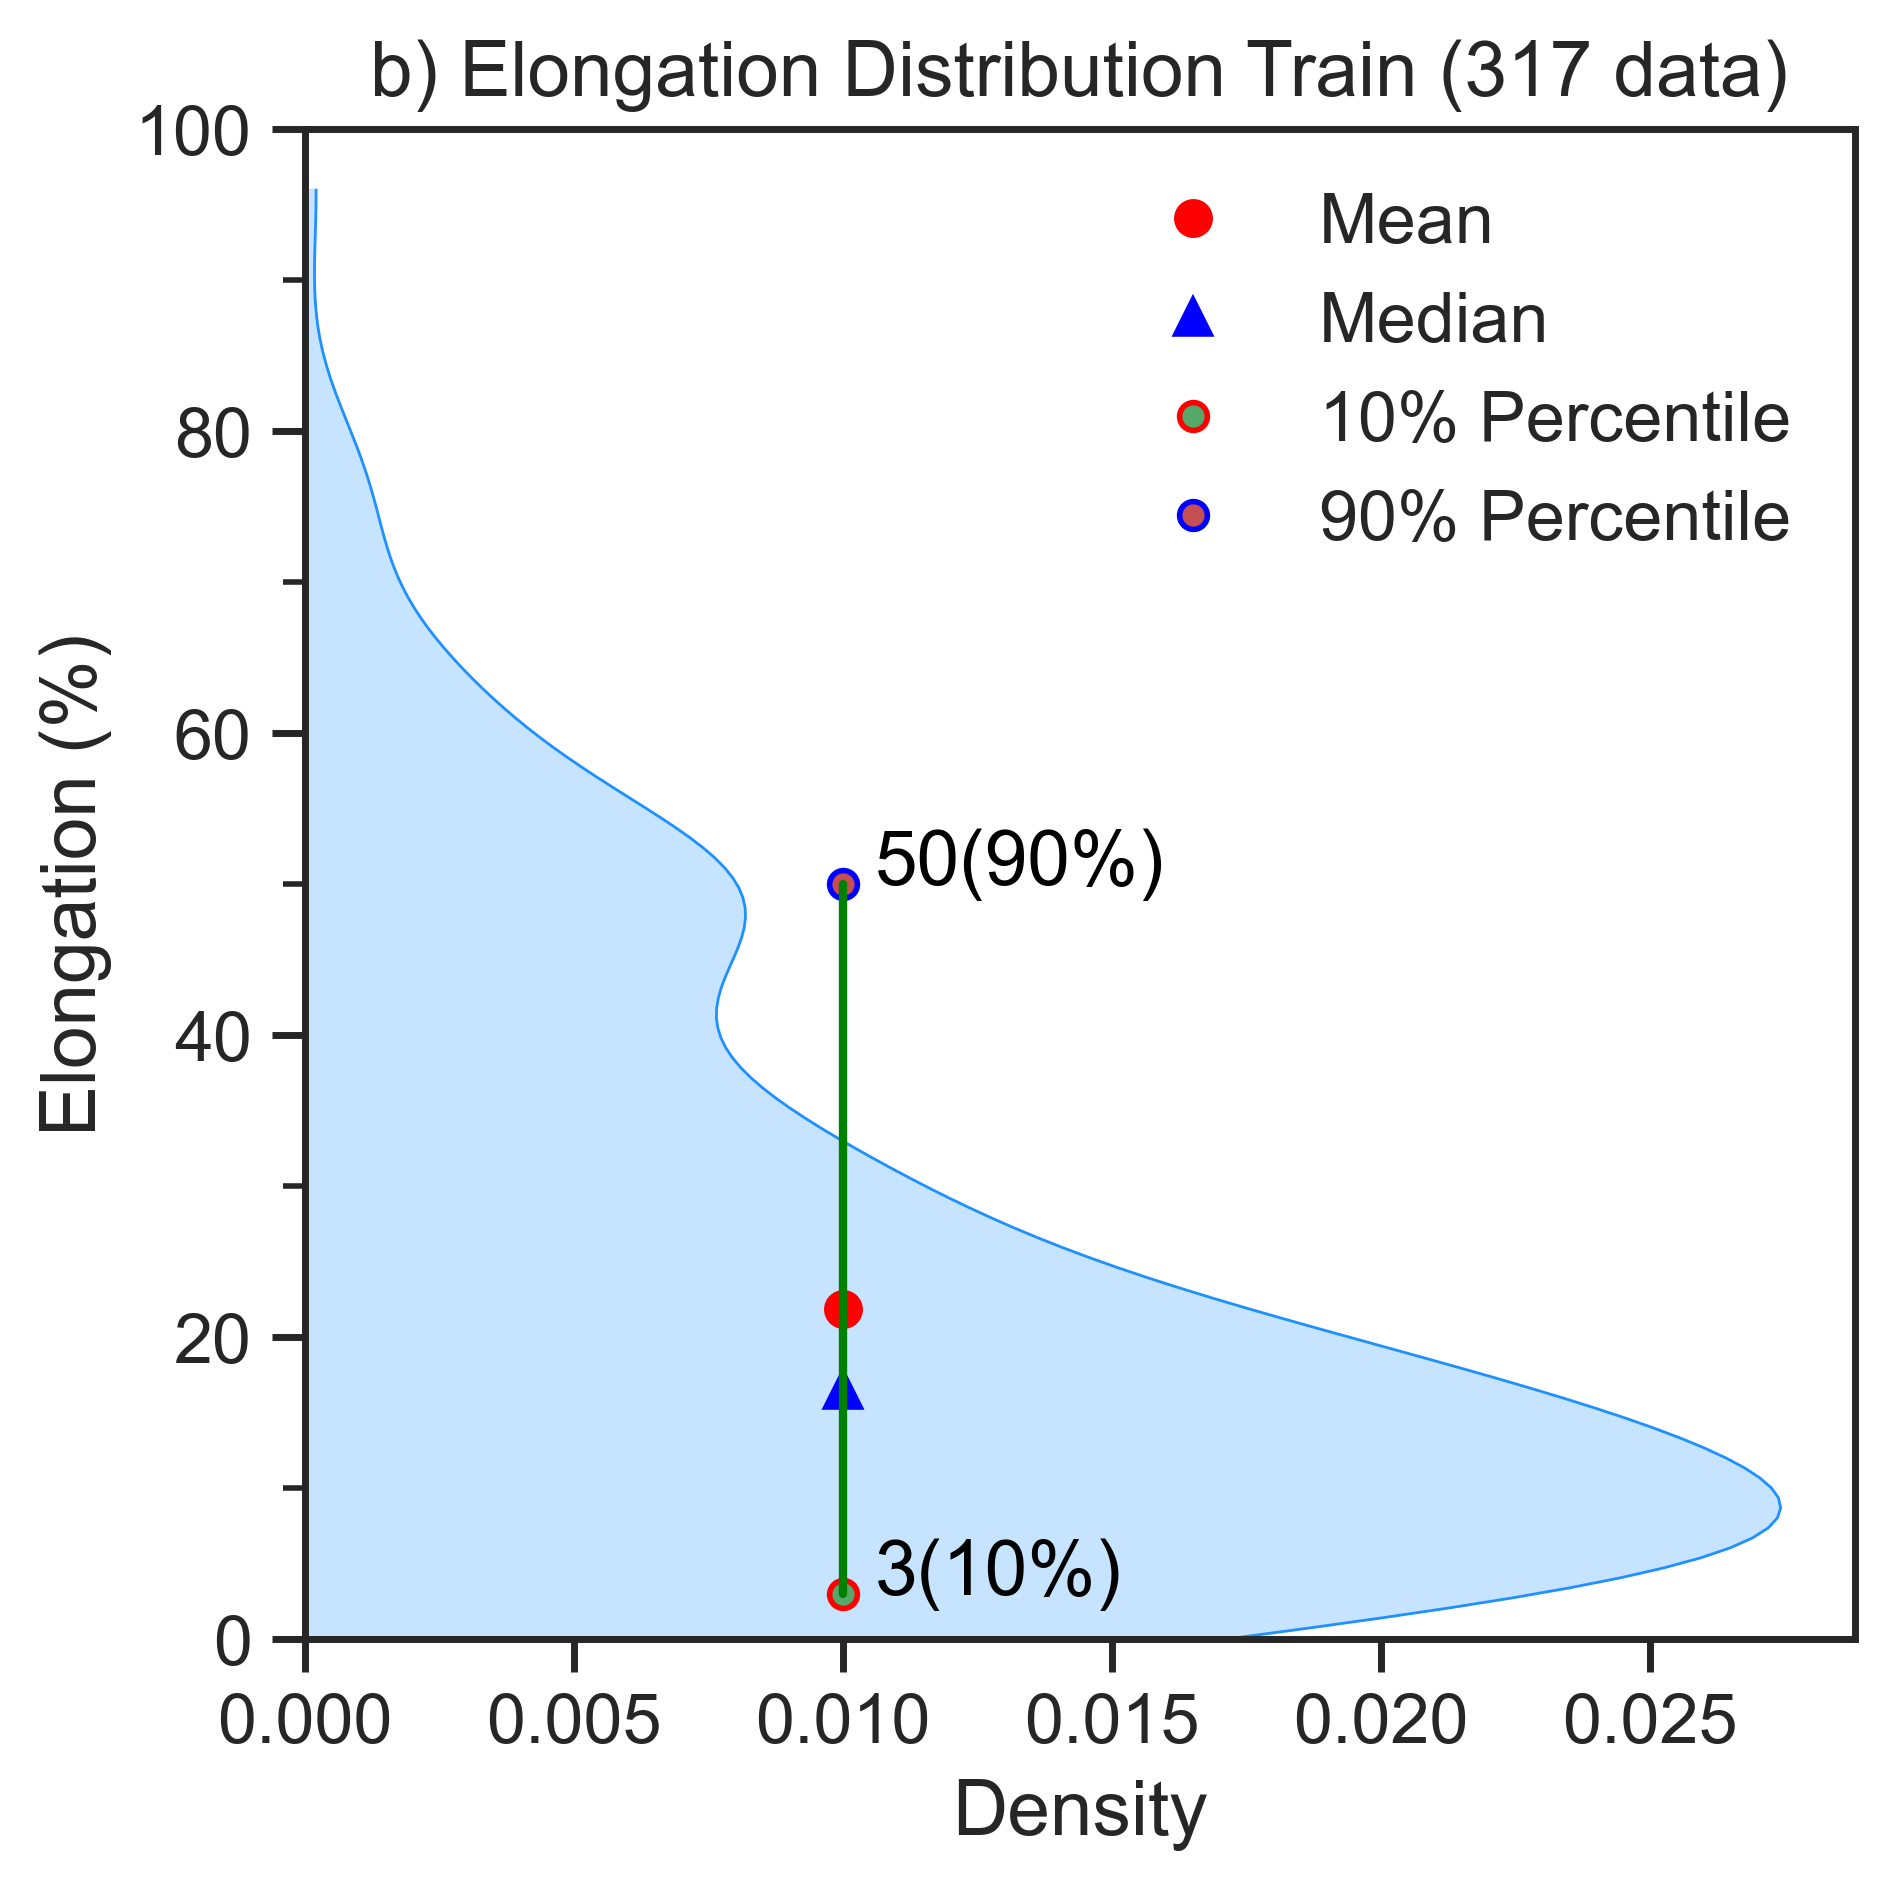

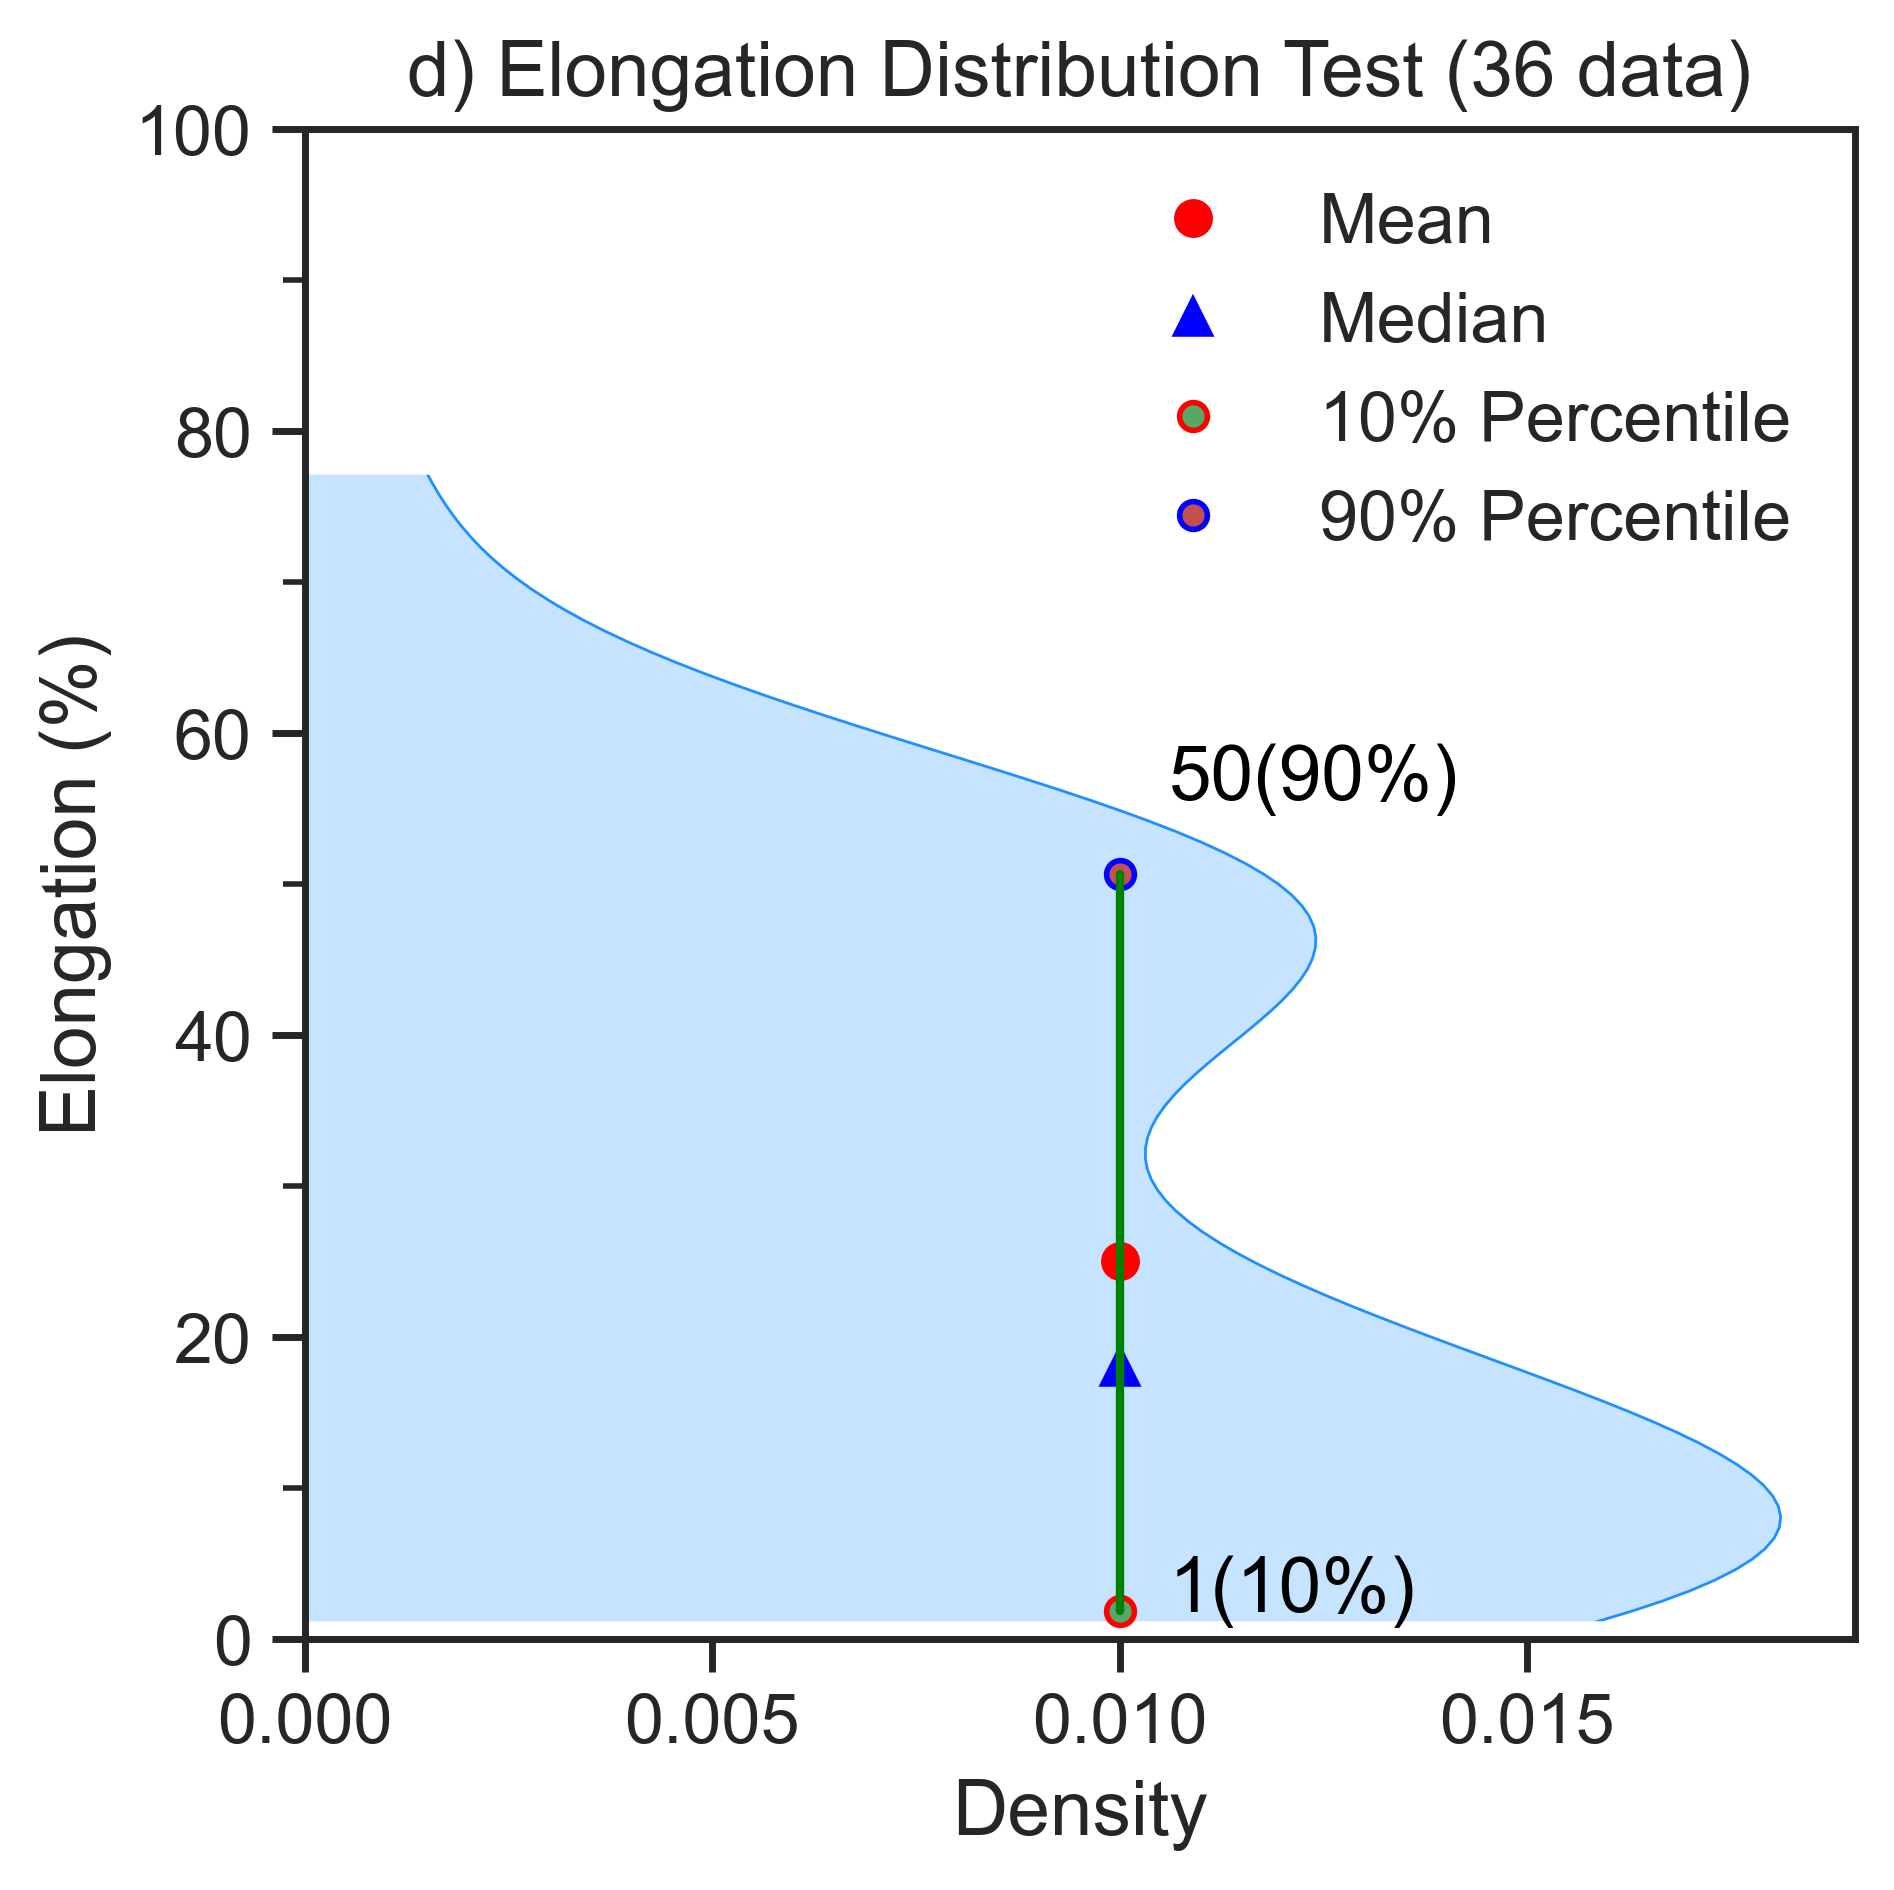

In [27]:
%run common_functions.ipynb

data_distribution(y_train,"Train",test_annotate2=0, limit=100,distance=0.01,ylabel = 'Elongation (%)', title="b) Elongation Distribution ",plot_path="plots\\elongation\\")
data_distribution(y_test,"Test",test_annotate2=5, limit=100,distance=0.01,ylabel = 'Elongation (%)', title="d) Elongation Distribution ",plot_path="plots\\elongation\\")

In [28]:
X_train_no_fab

$\delta$  Δ$\chi$         ΔTm        Tm(K)       VEC         AN  \
22   0.151611   0.2711  314.498310   817.802530  1.900280   9.901679   
180  0.082012   0.1225  225.243310  2133.368421  4.263158  32.263158   
93   0.108084   0.1721  141.847984   875.870112  3.347756  15.136218   
158  0.029126   0.1429  112.161714  1706.500000  8.500000  26.500000   
176  0.044839   0.1675  241.546861  1498.498006  9.144695  28.135048   
..        ...      ...         ...          ...       ...        ...   
71   0.105605   0.1250  411.542716  1708.748571  7.428571  24.285714   
106  0.239213   0.3183  770.175016  2134.333333  7.333333  22.666667   
270  0.170149   0.2322  378.544497  1672.462857  6.571429  26.000000   
348  0.140656   0.1808  549.567174  1814.194000  6.400000  24.600000   
102  0.203362   0.3542  407.981497  3234.069767  5.604651  52.581395   

              K           B        ΔB          G        ΔG    ΔSmix  \
22   148.518195   37.706788  0.714256  14.250052  0.725724  11.6374   
180   25.894737  111.802105  0.332650  40.526316  0.151765  11.7412   
93   209.762821   70.038462  0.221184  24.916987  0.266207   6.4359   
158   69.700000  162.500000  0.153075  69.187500  0.215766  11.5257   
176  162.755627  143.530547  0.205318  54.575563  0.287676  10.0823   
..          ...         ...       ...        ...       ...      ...   
71   147.285714  152.285714  0.221150  67.000000  0.403498  16.1783   
106   85.466667  140.500000  0.371513  72.583333  0.335973  14.8967   
270  137.000000  126.714286  0.390753  58.571429  0.508266  16.1783   
348  116.100000  151.200000  0.308357  66.200000  0.508092  14.5334   
102  108.325581  229.813953  0.396390  82.116279  0.772024  14.2143   

      $\lambda$    ΔHmix    $\Omega$  
22     506.2805  -1.1906   7993.5669  
180   1745.6423  -1.1062  22644.1144  
93     550.9176  -0.3914  14403.2648  
158  13586.1816  -3.8235   5144.1151  
176   5014.8014  -2.1297   7093.9978  
..          ...      ...         ...  
71    1450.6570 -12.7799   2163.1313  
106    260.3266  13.7376   2314.4218  
270    558.8250 -24.0727   1123.9975  
348    734.6021 -23.5346   1120.3296  
102    343.7054  -6.9087   6653.9713  

[317 rows x 15 columns]

# 4. Data Standarization

In [29]:
%run common_functions.ipynb
scaler, std_df = std_data(X_train_no_fab)

import pickle
pickle.dump(scaler, open(path+'scaler.pkl','wb'))

# 5. Feature Selections

## 5.1 PCC Heatmap

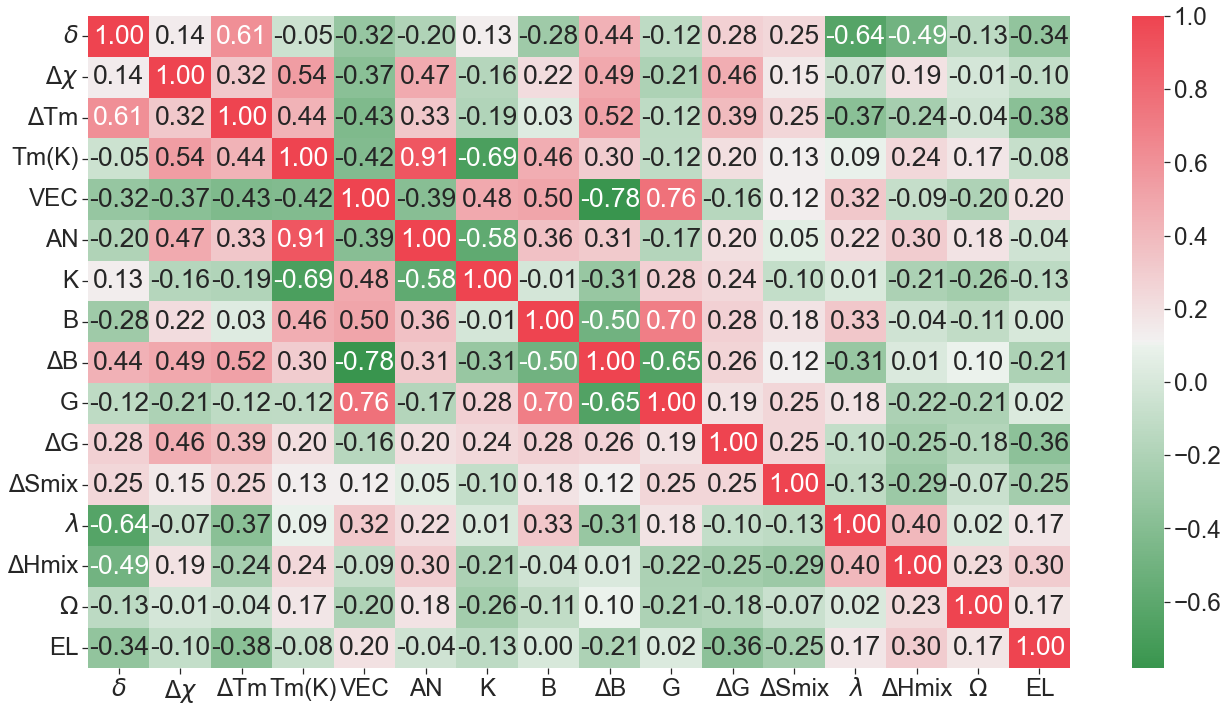

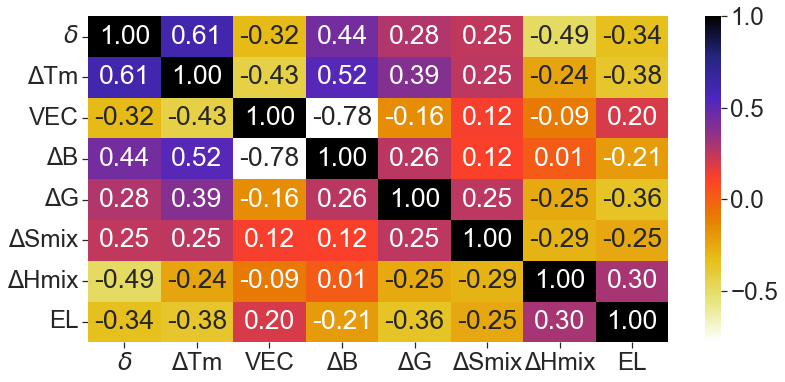

In [30]:

%run common_functions.ipynb

input_pcc = ['$\delta$', 'ΔTm', 'VEC', 'ΔB', 'ΔG', 'ΔSmix', 'ΔHmix']

pcc_fs(std_df,y_train,input_pcc,"plots\\elongation\\EL",prop='EL')

df_pcc_1 = std_df.loc[:,input_pcc]

df_pcc_2 = np.column_stack((df_pcc_1,X_train_fab))
df_pairplot =np.column_stack((df_pcc_1,y_train))

# For test datasets
# Standarization
std_test = scaler.transform(X_test_no_fab)
std_test_df = pd.DataFrame(data=std_test, columns=input_name)

# PCC Feature selection for test
test_pcc_1 = std_test_df.loc[:,input_pcc]

# Include Fab Process

test_pcc_2 = np.column_stack((test_pcc_1,X_test_fab))

In [31]:
df_pairplot = pd.DataFrame(df_pairplot,columns=input_pcc+["EL"])

In [32]:
df_pairplot

$\delta$       ΔTm       VEC        ΔB        ΔG     ΔSmix     ΔHmix  \
0    1.290030 -0.490841 -2.551760  3.568306  2.665699 -0.627919  0.841689   
1   -0.248161 -1.088843 -1.195053  0.464386 -1.373774 -0.574867  0.850914   
2    0.328039 -1.647586 -1.720654 -0.442261 -0.568340 -3.286387  0.929039   
3   -1.416977 -1.846482  1.237638 -0.996246 -0.923335 -0.685009  0.553923   
4   -1.069719 -0.979610  1.607806 -0.571308 -0.417242 -1.422725  0.739049   
..        ...       ...       ...       ...       ...       ...       ...   
312  0.273254  0.159351  0.622450 -0.442538  0.397903  1.692918 -0.424978   
313  3.226092  2.562163  0.567767  0.780489 -0.077329  1.037897  2.473286   
314  1.699714 -0.061735  0.130300  0.936985  1.135251  1.692918 -1.659239   
315  1.047905  1.084105  0.031870  0.266792  1.134027  0.852216 -1.600427   
316  2.433754  0.135491 -0.424800  0.982837  2.991554  0.689125  0.216722   

       EL  
0    13.0  
1    50.0  
2    16.0  
3    41.0  
4    20.0  
..    ...  
312  16.0  
313  31.9  
314   4.0  
315  10.4  
316  12.7  

[317 rows x 8 columns]

## VIF: Variance Inflation Factor for Multi-colinearity

In [33]:
%run common_functions.ipynb

print(vif_value(std_df))


vif_value(df_pcc_1)


    VIF Factor   features
0     5.025910   $\delta$
1     3.373691    Δ$\chi$
2     2.973789        ΔTm
3    60.482083      Tm(K)
4    11.098653        VEC
5    14.459843         AN
6     7.404250          K
7    31.213418          B
8     6.349636         ΔB
9     7.469968          G
10    3.248348         ΔG
11    1.657428      ΔSmix
12    2.081993  $\lambda$
13    2.994197      ΔHmix
14    1.170458   $\Omega$


VIF Factor  features
0    2.196177  $\delta$
1    2.002906       ΔTm
2    3.006542       VEC
3    3.319360        ΔB
4    1.256247        ΔG
5    1.319074     ΔSmix
6    1.567730     ΔHmix

In [34]:
n_component

No of Components
22                5.0
180               5.0
93                5.0
158               4.0
176               4.0
..                ...
71                7.0
106               6.0
270               7.0
348               6.0
102               6.0

[317 rows x 1 columns]

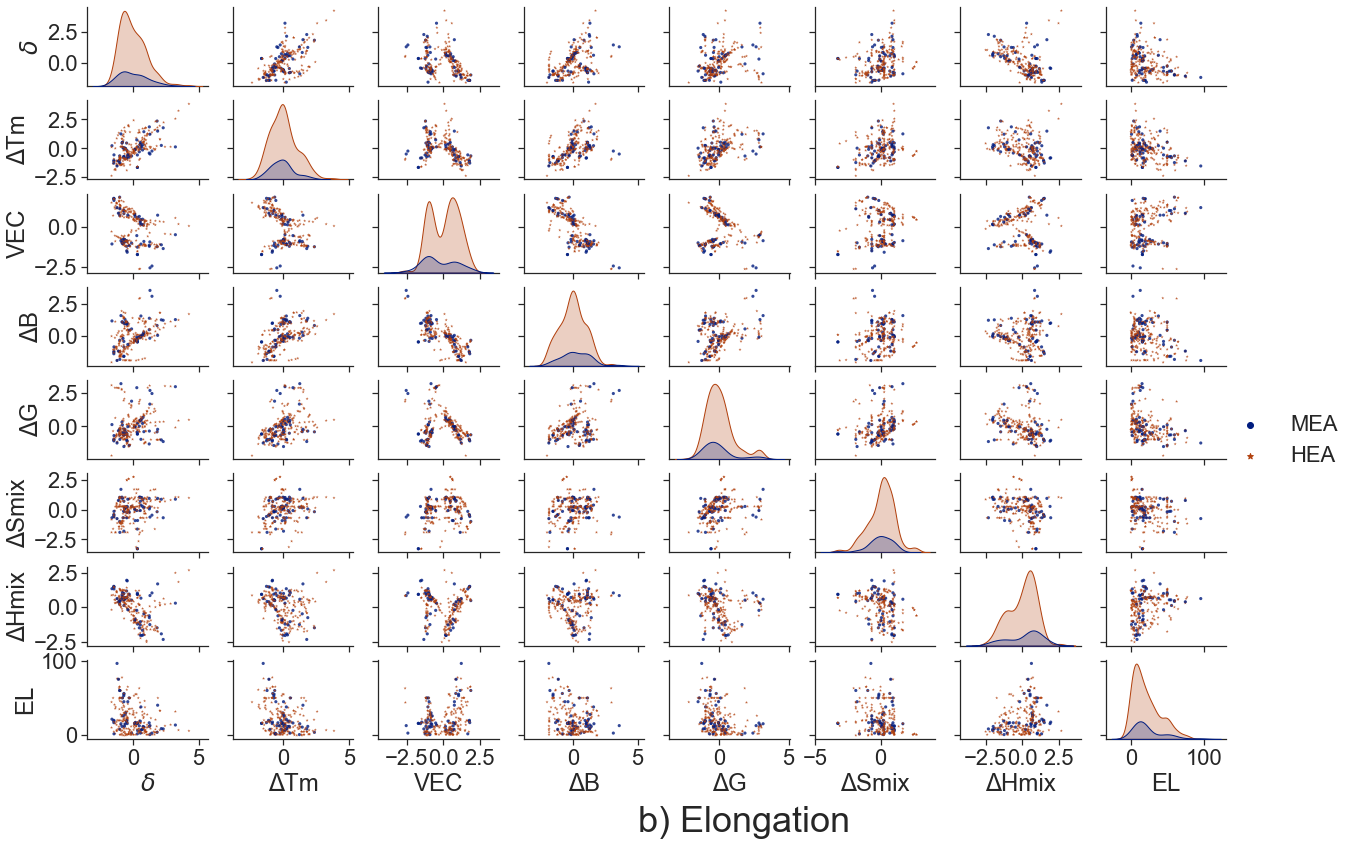

In [35]:
%run common_functions.ipynb
pairplot(df_pairplot ,n_component,'b) Elongation', "plots\\elongation\\")

## 5.2 PCA Feature Selections

### PCA_1: Feature selection by PCA to capture 0.9 data variance without fabrication process
#### 7 principal component required here.


### PCA_2: Feature selection by PCA to capture 0.9 data variance with fabrication process
#### 8 principal component required here.

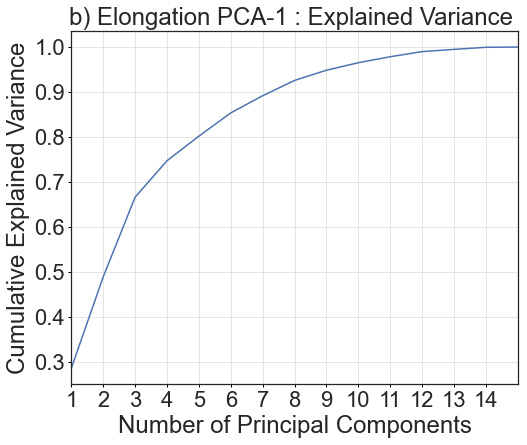

No. of components for PCA: 8
Explained variance for  8 components:  [0.28643191 0.20301628 0.17702027 0.08083749 0.05465617 0.05165407
 0.0381293  0.03397999]
Cumulative: [0.28643191 0.48944819 0.66646846 0.74730596 0.80196212 0.85361619
 0.8917455  0.92572549]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


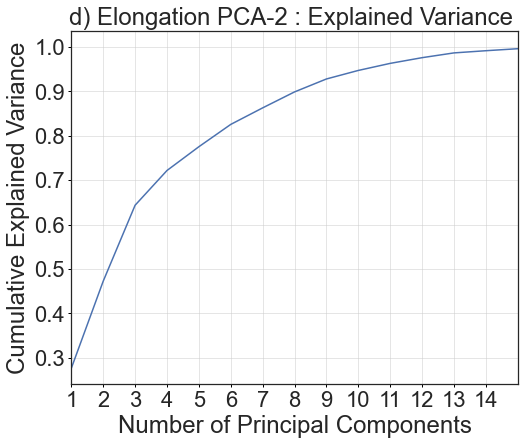

No. of components for PCA: 9
Explained variance for  9 components:  [0.27655011 0.19609531 0.17102194 0.07822212 0.05355414 0.05027098
 0.03722017 0.03595246 0.02914141]
Cumulative: [0.27655011 0.47264542 0.64366736 0.72188949 0.77544362 0.8257146
 0.86293477 0.89888723 0.92802865]


In [39]:
%run common_functions.ipynb

# df_pca_1: dataset for training
# test_pca_1 : Dataset for test

pca_1, df_pca_1 = pca_fs(std_df,"plots\\elongation\\el_pca-1", title="b) Elongation PCA-1")
import pickle
pickle.dump(pca_1, open(path+'pca_1.pkl','wb'))

std_test = scaler.transform(X_test_no_fab)
test_pca_1 =  pca_1.transform(std_test)



# df_pca_2: dataset for training
# test_pca_2 : Dataset for test
std_df_fab = np.column_stack((std_df,X_train_fab))
pca_2, df_pca_2 = pca_fs(std_df_fab,"plots\\elongation\\el_pca-2", title="d) Elongation PCA-2")

pickle.dump(pca_2, open(path+'pca_2.pkl','wb'))

std_test_fab = np.column_stack((std_test,X_test_fab))
test_pca_2 =  pca_2.transform(std_test_fab)

# 6. Machine Learning Model

# PCC- Model 1

## Hyper-parameter tuning by RandomSearchCV()

### change n_iter to change selection of "n model" randomly from the possible combinations of models
### change cv to change the cross validation
### put n_iter = less than 100, cv= 10 to test sample tuning the tuning 

In [32]:
%run common_functions.ipynb
import tensorflow as tf

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

# Run model with 90/10 datasets with optimized parameters
input_dim = df_pcc_1.shape[1]
print(input_dim)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 150
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pcc_1.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
model_pcc_1 = create_model(lyrs=8, neuron_size=48, act='selu', opt='RMSprop', dr=0.05, learning_rate=0.001,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/20 CV split
history_pcc_1=model_pcc_1.fit(df_pcc_1, y_train,epochs=150,batch_size=6,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])

7
Epoch 1/150
48/48 - 2s - loss: 376.4516 - mse: 368.8716 - mape: 267001072.0000 - mae: 14.5014 - root_mean_squared_error: 19.2060 - val_loss: 275.9560 - val_mse: 268.3771 - val_mape: 223.6105 - val_mae: 12.9805 - val_root_mean_squared_error: 16.3822 - 2s/epoch - 34ms/step
Epoch 2/150
48/48 - 0s - loss: 302.2892 - mse: 294.7143 - mape: 256728880.0000 - mae: 13.0405 - root_mean_squared_error: 17.1672 - val_loss: 292.4812 - val_mse: 284.9088 - val_mape: 215.4924 - val_mae: 13.3494 - val_root_mean_squared_error: 16.8792 - 100ms/epoch - 2ms/step
Epoch 3/150
48/48 - 0s - loss: 287.9739 - mse: 280.3996 - mape: 170945088.0000 - mae: 12.8700 - root_mean_squared_error: 16.7451 - val_loss: 266.0898 - val_mse: 258.5199 - val_mape: 168.2932 - val_mae: 12.4073 - val_root_mean_squared_error: 16.0786 - 160ms/epoch - 3ms/step
Epoch 4/150
48/48 - 0s - loss: 279.6356 - mse: 272.0612 - mape: 133374352.0000 - mae: 12.4047 - root_mean_squared_error: 16.4943 - val_loss: 265.6149 - val_mse: 258.0388 - val_ma

Epoch 31/150
48/48 - 0s - loss: 166.2869 - mse: 158.5585 - mape: 27323484.0000 - mae: 9.1339 - root_mean_squared_error: 12.5920 - val_loss: 168.5862 - val_mse: 160.8581 - val_mape: 116.2977 - val_mae: 10.4781 - val_root_mean_squared_error: 12.6830 - 165ms/epoch - 3ms/step
Epoch 32/150
48/48 - 0s - loss: 152.8879 - mse: 145.1566 - mape: 14223607.0000 - mae: 8.3805 - root_mean_squared_error: 12.0481 - val_loss: 287.1114 - val_mse: 279.3779 - val_mape: 247.5451 - val_mae: 12.6246 - val_root_mean_squared_error: 16.7146 - 87ms/epoch - 2ms/step
Epoch 33/150
48/48 - 0s - loss: 160.7171 - mse: 152.9776 - mape: 50215320.0000 - mae: 9.1165 - root_mean_squared_error: 12.3684 - val_loss: 190.9027 - val_mse: 183.1653 - val_mape: 154.4393 - val_mae: 10.5844 - val_root_mean_squared_error: 13.5339 - 102ms/epoch - 2ms/step
Epoch 34/150
48/48 - 0s - loss: 152.3285 - mse: 144.5887 - mape: 16718275.0000 - mae: 8.6656 - root_mean_squared_error: 12.0245 - val_loss: 188.7604 - val_mse: 181.0148 - val_mape: 1

Epoch 62/150
48/48 - 0s - loss: 118.7421 - mse: 110.8563 - mape: 22102486.0000 - mae: 7.4387 - root_mean_squared_error: 10.5288 - val_loss: 149.5747 - val_mse: 141.6935 - val_mape: 109.1978 - val_mae: 8.8857 - val_root_mean_squared_error: 11.9035 - 111ms/epoch - 2ms/step
Epoch 63/150
48/48 - 0s - loss: 123.5676 - mse: 115.6851 - mape: 18438982.0000 - mae: 7.7632 - root_mean_squared_error: 10.7557 - val_loss: 187.6830 - val_mse: 179.7954 - val_mape: 128.9184 - val_mae: 9.3791 - val_root_mean_squared_error: 13.4088 - 134ms/epoch - 3ms/step
Epoch 64/150
48/48 - 0s - loss: 121.3246 - mse: 113.4365 - mape: 14583998.0000 - mae: 7.7362 - root_mean_squared_error: 10.6507 - val_loss: 147.1077 - val_mse: 139.2219 - val_mape: 101.3773 - val_mae: 9.2443 - val_root_mean_squared_error: 11.7992 - 117ms/epoch - 2ms/step
Epoch 65/150
48/48 - 0s - loss: 109.6047 - mse: 101.7135 - mape: 28163410.0000 - mae: 7.1123 - root_mean_squared_error: 10.0853 - val_loss: 150.9982 - val_mse: 143.1064 - val_mape: 98.

Epoch 93/150
48/48 - 0s - loss: 119.2491 - mse: 111.2393 - mape: 30075884.0000 - mae: 7.4142 - root_mean_squared_error: 10.5470 - val_loss: 164.5268 - val_mse: 156.5159 - val_mape: 114.0037 - val_mae: 9.0856 - val_root_mean_squared_error: 12.5106 - 133ms/epoch - 3ms/step
Epoch 94/150
48/48 - 0s - loss: 99.6901 - mse: 91.6774 - mape: 97.9616 - mae: 6.7743 - root_mean_squared_error: 9.5748 - val_loss: 183.0716 - val_mse: 175.0563 - val_mape: 115.1882 - val_mae: 9.6144 - val_root_mean_squared_error: 13.2309 - 107ms/epoch - 2ms/step
Epoch 95/150
48/48 - 0s - loss: 100.6821 - mse: 92.6685 - mape: 10888169.0000 - mae: 6.7922 - root_mean_squared_error: 9.6264 - val_loss: 206.2225 - val_mse: 198.2054 - val_mape: 110.8172 - val_mae: 10.0806 - val_root_mean_squared_error: 14.0785 - 128ms/epoch - 3ms/step
Epoch 96/150
48/48 - 0s - loss: 110.3575 - mse: 102.3378 - mape: 17964954.0000 - mae: 7.3676 - root_mean_squared_error: 10.1162 - val_loss: 150.8384 - val_mse: 142.8251 - val_mape: 107.2526 - va

Epoch 124/150
48/48 - 0s - loss: 86.6803 - mse: 78.5527 - mape: 62.5056 - mae: 6.1308 - root_mean_squared_error: 8.8630 - val_loss: 164.8059 - val_mse: 156.6740 - val_mape: 102.7704 - val_mae: 9.2231 - val_root_mean_squared_error: 12.5169 - 136ms/epoch - 3ms/step
Epoch 125/150
48/48 - 0s - loss: 72.9503 - mse: 64.8172 - mape: 26913652.0000 - mae: 5.6618 - root_mean_squared_error: 8.0509 - val_loss: 165.2036 - val_mse: 157.0617 - val_mape: 110.4721 - val_mae: 9.6358 - val_root_mean_squared_error: 12.5324 - 147ms/epoch - 3ms/step
Epoch 126/150
48/48 - 0s - loss: 90.4531 - mse: 82.3121 - mape: 26545808.0000 - mae: 6.5279 - root_mean_squared_error: 9.0726 - val_loss: 171.1006 - val_mse: 162.9624 - val_mape: 94.5024 - val_mae: 8.9313 - val_root_mean_squared_error: 12.7657 - 106ms/epoch - 2ms/step
Epoch 127/150
48/48 - 0s - loss: 93.4034 - mse: 85.2728 - mape: 71.0093 - mae: 6.6211 - root_mean_squared_error: 9.2343 - val_loss: 149.8834 - val_mse: 141.7505 - val_mape: 107.2846 - val_mae: 8.96

In [33]:
model_pcc_1.save(path+"model_pcc_1.h5")

In [34]:
test_loss = model_pcc_1.evaluate(test_pcc_1, y_test, verbose=2)

2/2 - 0s - loss: 153.4879 - mse: 145.2455 - mape: 119.8904 - mae: 7.3815 - root_mean_squared_error: 12.0518 - 15ms/epoch - 7ms/step


In [35]:
model_pcc_1.save(path+"model_pcc_1.h5")

In [36]:
from keras.models import load_model

best_model_pcc_1 = load_model(path+'best_model_pcc_1.h5')
best_model_pcc_1.evaluate(test_pcc_1, y_test, verbose=2)

2/2 - 0s - loss: 152.4833 - mse: 144.2651 - mape: 89.0508 - mae: 7.9009 - root_mean_squared_error: 12.0110 - 251ms/epoch - 125ms/step


[152.4832763671875,
 144.2650604248047,
 89.05079650878906,
 7.900947570800781,
 12.011038780212402]

In [ ]:

%run common_functions.ipynb
# For Learning rates, weight constraint and init_weights
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

input_dim = df_pcc_2.shape[1]
from tensorflow.keras.optimizers import Adam, Nadam
# 
epochs = 150
batch_size = [4,6]
layers = [6,8]
neuron_size = [48,64]
optimizer = ['RMSprop','Adam', 'Nadam']
activation = ['relu', 'selu', 'LeakyReLU']
drops = [0.05,0.075, 0.1,0.2]
learning_rate = [0.00025,0.0005,0.00075,0.001]
weight_constraint = [2]
init_weights = ['normal', 'he_uniform']

# Complete set of hyper-parameter

#batch_size = [2,4,6]
#layers = [4,6]
#neuron_size = [32,48,64]
#optimizer = ['SGD','RMSprop', 'Adam', 'Nadam']
#activation = ['relu', 'selu', 'LeakyReLU', 'PReLU']
#drops = [0.05,0.075,0.08,0.1,0.15,0.2]
#learning_rate = [0.0001,0.00025,0.000375,0.0004,0.0005,0.00075,0.001,0.005,0.01]

#For weight initialization
#weight_constraint = [1,2,3]
#init_weights = ['uniform', 'normal', 'he_uniform']


model = KerasRegressor(build_fn= create_model, 
                        epochs= epochs, 
                        batch_size = batch_size, 
                        verbose=2)


# Make dictionary of learning rate and momuntum grid

param_grid = dict( batch_size = batch_size, lyrs=layers, neuron_size = neuron_size, opt=optimizer,act=activation, dr=drops, learning_rate = learning_rate,init_weights=init_weights, weight_constraint = weight_constraint)
grid = RandomizedSearchCV(estimator= model, param_distributions=param_grid,n_iter=300, n_jobs=-1, cv=10, scoring='r2', verbose=2)

grid_result = grid.fit(df_pcc_2, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

# PCC-2

In [37]:
%run common_functions.ipynb
import tensorflow as tf

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

# Run model with 90/10 datasets with optimized parameters
input_dim = df_pcc_2.shape[1]
print(input_dim)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 150
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pcc_2.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
model_pcc_2 = create_model(lyrs=6, neuron_size=64, act='selu', opt='Adam', dr=0.05, learning_rate=0.0005,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/20 CV split
history_pcc_2=model_pcc_2.fit(df_pcc_2, y_train,epochs=150,batch_size=6,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])

11
Epoch 1/150
48/48 - 1s - loss: 612.0986 - mse: 604.5416 - mape: 100.0417 - mae: 18.1823 - root_mean_squared_error: 24.5874 - val_loss: 504.1310 - val_mse: 496.5660 - val_mape: 220.7130 - val_mae: 17.6487 - val_root_mean_squared_error: 22.2838 - 1s/epoch - 21ms/step
Epoch 2/150
48/48 - 0s - loss: 345.0116 - mse: 337.4425 - mape: 102785568.0000 - mae: 14.0191 - root_mean_squared_error: 18.3696 - val_loss: 380.1952 - val_mse: 372.6227 - val_mape: 231.6466 - val_mae: 15.5846 - val_root_mean_squared_error: 19.3034 - 130ms/epoch - 3ms/step
Epoch 3/150
48/48 - 0s - loss: 259.3429 - mse: 251.7659 - mape: 188180816.0000 - mae: 12.1671 - root_mean_squared_error: 15.8671 - val_loss: 308.0876 - val_mse: 300.5097 - val_mape: 203.1434 - val_mae: 14.1468 - val_root_mean_squared_error: 17.3352 - 152ms/epoch - 3ms/step
Epoch 4/150
48/48 - 0s - loss: 264.0280 - mse: 256.4487 - mape: 150196432.0000 - mae: 11.9585 - root_mean_squared_error: 16.0140 - val_loss: 286.9994 - val_mse: 279.4200 - val_mape: 2

48/48 - 0s - loss: 169.6919 - mse: 161.9833 - mape: 43189620.0000 - mae: 9.0013 - root_mean_squared_error: 12.7273 - val_loss: 215.4753 - val_mse: 207.7661 - val_mape: 233.3357 - val_mae: 11.5009 - val_root_mean_squared_error: 14.4141 - 112ms/epoch - 2ms/step
Epoch 32/150
48/48 - 0s - loss: 154.7259 - mse: 147.0123 - mape: 59992980.0000 - mae: 8.7310 - root_mean_squared_error: 12.1249 - val_loss: 208.5264 - val_mse: 200.8151 - val_mape: 217.9211 - val_mae: 10.9363 - val_root_mean_squared_error: 14.1709 - 121ms/epoch - 3ms/step
Epoch 33/150
48/48 - 0s - loss: 157.5026 - mse: 149.7863 - mape: 19492718.0000 - mae: 8.8994 - root_mean_squared_error: 12.2387 - val_loss: 220.2118 - val_mse: 212.4906 - val_mape: 249.2063 - val_mae: 11.0615 - val_root_mean_squared_error: 14.5771 - 118ms/epoch - 2ms/step
Epoch 34/150
48/48 - 0s - loss: 140.2612 - mse: 132.5370 - mape: 52861948.0000 - mae: 8.3257 - root_mean_squared_error: 11.5125 - val_loss: 206.8622 - val_mse: 199.1349 - val_mape: 233.4752 - va

Epoch 62/150
48/48 - 0s - loss: 144.0888 - mse: 136.2677 - mape: 3351285.2500 - mae: 7.8966 - root_mean_squared_error: 11.6734 - val_loss: 178.6665 - val_mse: 170.8465 - val_mape: 209.8246 - val_mae: 9.3654 - val_root_mean_squared_error: 13.0708 - 105ms/epoch - 2ms/step
Epoch 63/150
48/48 - 0s - loss: 116.3794 - mse: 108.5629 - mape: 8535056.0000 - mae: 7.3997 - root_mean_squared_error: 10.4194 - val_loss: 153.6181 - val_mse: 145.8002 - val_mape: 190.3867 - val_mae: 9.2611 - val_root_mean_squared_error: 12.0748 - 147ms/epoch - 3ms/step
Epoch 64/150
48/48 - 0s - loss: 131.9137 - mse: 124.0913 - mape: 35629936.0000 - mae: 7.8395 - root_mean_squared_error: 11.1396 - val_loss: 143.3535 - val_mse: 135.5313 - val_mape: 147.0110 - val_mae: 9.1153 - val_root_mean_squared_error: 11.6418 - 134ms/epoch - 3ms/step
Epoch 65/150
48/48 - 0s - loss: 109.9476 - mse: 102.1227 - mape: 69.6006 - mae: 6.9182 - root_mean_squared_error: 10.1056 - val_loss: 159.3707 - val_mse: 151.5395 - val_mape: 178.0431 - 

Epoch 93/150
48/48 - 0s - loss: 98.3467 - mse: 90.4157 - mape: 69.5821 - mae: 6.5710 - root_mean_squared_error: 9.5087 - val_loss: 148.3493 - val_mse: 140.4166 - val_mape: 150.2539 - val_mae: 9.4079 - val_root_mean_squared_error: 11.8498 - 100ms/epoch - 2ms/step
Epoch 94/150
48/48 - 0s - loss: 123.7012 - mse: 115.7677 - mape: 29495068.0000 - mae: 7.2295 - root_mean_squared_error: 10.7595 - val_loss: 159.9664 - val_mse: 152.0292 - val_mape: 158.1341 - val_mae: 9.1863 - val_root_mean_squared_error: 12.3300 - 133ms/epoch - 3ms/step
Epoch 95/150
48/48 - 0s - loss: 102.5985 - mse: 94.6636 - mape: 81.5256 - mae: 6.8842 - root_mean_squared_error: 9.7295 - val_loss: 145.8125 - val_mse: 137.8773 - val_mape: 141.1116 - val_mae: 9.0124 - val_root_mean_squared_error: 11.7421 - 129ms/epoch - 3ms/step
Epoch 96/150
48/48 - 0s - loss: 104.1645 - mse: 96.2278 - mape: 41401396.0000 - mae: 6.7968 - root_mean_squared_error: 9.8096 - val_loss: 122.4076 - val_mse: 114.4716 - val_mape: 119.0806 - val_mae: 8.

Epoch 124/150
48/48 - 0s - loss: 80.3441 - mse: 72.3329 - mape: 58.2449 - mae: 6.1481 - root_mean_squared_error: 8.5049 - val_loss: 91.9055 - val_mse: 83.8940 - val_mape: 75.8280 - val_mae: 6.8251 - val_root_mean_squared_error: 9.1594 - 144ms/epoch - 3ms/step
Epoch 125/150
48/48 - 0s - loss: 87.7304 - mse: 79.7168 - mape: 64.0381 - mae: 6.2594 - root_mean_squared_error: 8.9284 - val_loss: 139.2441 - val_mse: 131.2283 - val_mape: 121.4035 - val_mae: 7.8650 - val_root_mean_squared_error: 11.4555 - 115ms/epoch - 2ms/step
Epoch 126/150
48/48 - 0s - loss: 94.8703 - mse: 86.8533 - mape: 81.2746 - mae: 6.4407 - root_mean_squared_error: 9.3195 - val_loss: 122.5290 - val_mse: 114.5146 - val_mape: 92.9769 - val_mae: 8.1031 - val_root_mean_squared_error: 10.7012 - 103ms/epoch - 2ms/step
Epoch 127/150
48/48 - 0s - loss: 85.0331 - mse: 77.0160 - mape: 31648704.0000 - mae: 6.3441 - root_mean_squared_error: 8.7759 - val_loss: 111.1908 - val_mse: 103.1722 - val_mape: 94.3935 - val_mae: 8.0236 - val_ro

In [38]:
model_pcc_2.save(path+"model_pcc_2.h5")

In [39]:
test_loss = model_pcc_2.evaluate(test_pcc_2, y_test, verbose=2)

2/2 - 0s - loss: 174.5620 - mse: 166.4983 - mape: 105.2625 - mae: 8.2611 - root_mean_squared_error: 12.9034 - 25ms/epoch - 12ms/step


In [40]:
model_pcc_2.save(path+"model_pcc_2.h5")

In [41]:
from keras.models import load_model

best_model_pcc_2 = load_model(path+'best_model_pcc_2.h5')
best_model_pcc_2.evaluate(test_pcc_2, y_test, verbose=2)

2/2 - 0s - loss: 160.3925 - mse: 152.3810 - mape: 99.5808 - mae: 8.3350 - root_mean_squared_error: 12.3443 - 125ms/epoch - 62ms/step


[160.3925323486328,
 152.38099670410156,
 99.58078002929688,
 8.334982872009277,
 12.344269752502441]

# PCA_1: Without Fab methods

In [42]:
# Run model with 90/10 datasets with optimized parameters
input_dim = df_pca_1.shape[1]
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 150
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pca_1.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
model_pca_1 = create_model(lyrs=8, neuron_size=64, act='selu', opt='Nadam', dr=0.25, learning_rate=0.0005,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/20 CV split
history_pca_1=model_pca_1.fit(df_pca_1, y_train,epochs=150,batch_size=6,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])

Epoch 1/150
48/48 - 1s - loss: 580.2188 - mse: 570.1161 - mape: 106597144.0000 - mae: 17.6657 - root_mean_squared_error: 23.8771 - val_loss: 519.0545 - val_mse: 508.9558 - val_mape: 126.8009 - val_mae: 17.0594 - val_root_mean_squared_error: 22.5600 - 1s/epoch - 25ms/step
Epoch 2/150
48/48 - 0s - loss: 485.8536 - mse: 475.7588 - mape: 114294088.0000 - mae: 16.0654 - root_mean_squared_error: 21.8119 - val_loss: 497.4258 - val_mse: 487.3356 - val_mape: 137.2328 - val_mae: 16.7915 - val_root_mean_squared_error: 22.0757 - 162ms/epoch - 3ms/step
Epoch 3/150
48/48 - 0s - loss: 490.3951 - mse: 480.3091 - mape: 153206704.0000 - mae: 16.1282 - root_mean_squared_error: 21.9160 - val_loss: 491.6893 - val_mse: 481.6102 - val_mape: 148.6536 - val_mae: 17.0157 - val_root_mean_squared_error: 21.9456 - 141ms/epoch - 3ms/step
Epoch 4/150
48/48 - 0s - loss: 396.4277 - mse: 386.3503 - mape: 101847640.0000 - mae: 14.7629 - root_mean_squared_error: 19.6558 - val_loss: 459.9251 - val_mse: 449.8490 - val_mape

Epoch 31/150
48/48 - 0s - loss: 316.7915 - mse: 306.8311 - mape: 107974728.0000 - mae: 13.2964 - root_mean_squared_error: 17.5166 - val_loss: 337.5811 - val_mse: 327.6207 - val_mape: 193.8858 - val_mae: 14.1484 - val_root_mean_squared_error: 18.1003 - 131ms/epoch - 3ms/step
Epoch 32/150
48/48 - 0s - loss: 308.9516 - mse: 298.9926 - mape: 140277088.0000 - mae: 12.8736 - root_mean_squared_error: 17.2914 - val_loss: 328.5160 - val_mse: 318.5576 - val_mape: 179.3322 - val_mae: 14.0164 - val_root_mean_squared_error: 17.8482 - 137ms/epoch - 3ms/step
Epoch 33/150
48/48 - 0s - loss: 347.7677 - mse: 337.8092 - mape: 152789136.0000 - mae: 13.5527 - root_mean_squared_error: 18.3796 - val_loss: 328.0186 - val_mse: 318.0613 - val_mape: 189.4433 - val_mae: 14.0116 - val_root_mean_squared_error: 17.8343 - 148ms/epoch - 3ms/step
Epoch 34/150
48/48 - 0s - loss: 306.4805 - mse: 296.5273 - mape: 133193296.0000 - mae: 12.9401 - root_mean_squared_error: 17.2200 - val_loss: 336.5083 - val_mse: 326.5565 - va

Epoch 61/150
48/48 - 0s - loss: 301.6479 - mse: 291.7622 - mape: 216082496.0000 - mae: 13.0327 - root_mean_squared_error: 17.0810 - val_loss: 303.0864 - val_mse: 293.2032 - val_mape: 206.4739 - val_mae: 13.7356 - val_root_mean_squared_error: 17.1232 - 136ms/epoch - 3ms/step
Epoch 62/150
48/48 - 0s - loss: 277.9318 - mse: 268.0479 - mape: 120327088.0000 - mae: 12.4744 - root_mean_squared_error: 16.3722 - val_loss: 313.2406 - val_mse: 303.3598 - val_mape: 216.7837 - val_mae: 13.9379 - val_root_mean_squared_error: 17.4172 - 116ms/epoch - 2ms/step
Epoch 63/150
48/48 - 0s - loss: 247.1726 - mse: 237.2943 - mape: 97566632.0000 - mae: 11.8274 - root_mean_squared_error: 15.4044 - val_loss: 331.1993 - val_mse: 321.3181 - val_mape: 232.9249 - val_mae: 14.1770 - val_root_mean_squared_error: 17.9253 - 117ms/epoch - 2ms/step
Epoch 64/150
48/48 - 0s - loss: 327.5846 - mse: 317.7056 - mape: 120860872.0000 - mae: 13.6014 - root_mean_squared_error: 17.8243 - val_loss: 313.1047 - val_mse: 303.2337 - val

Epoch 91/150
48/48 - 0s - loss: 244.7776 - mse: 234.9418 - mape: 129237464.0000 - mae: 11.6054 - root_mean_squared_error: 15.3278 - val_loss: 303.6873 - val_mse: 293.8551 - val_mape: 214.3362 - val_mae: 13.4717 - val_root_mean_squared_error: 17.1422 - 131ms/epoch - 3ms/step
Epoch 92/150
48/48 - 0s - loss: 288.2341 - mse: 278.4053 - mape: 118569608.0000 - mae: 12.4114 - root_mean_squared_error: 16.6855 - val_loss: 313.9725 - val_mse: 304.1452 - val_mape: 209.1942 - val_mae: 13.7161 - val_root_mean_squared_error: 17.4398 - 129ms/epoch - 3ms/step
Epoch 93/150
48/48 - 0s - loss: 238.0182 - mse: 228.1904 - mape: 125254832.0000 - mae: 11.7524 - root_mean_squared_error: 15.1060 - val_loss: 317.3905 - val_mse: 307.5652 - val_mape: 209.0170 - val_mae: 13.6875 - val_root_mean_squared_error: 17.5375 - 124ms/epoch - 3ms/step
Epoch 94/150
48/48 - 0s - loss: 258.7417 - mse: 248.9169 - mape: 150746112.0000 - mae: 11.9832 - root_mean_squared_error: 15.7771 - val_loss: 311.3412 - val_mse: 301.5134 - va

Epoch 121/150
48/48 - 0s - loss: 239.7072 - mse: 229.9261 - mape: 62522596.0000 - mae: 11.1012 - root_mean_squared_error: 15.1633 - val_loss: 301.2787 - val_mse: 291.4975 - val_mape: 225.7825 - val_mae: 13.3357 - val_root_mean_squared_error: 17.0733 - 133ms/epoch - 3ms/step
Epoch 122/150
48/48 - 0s - loss: 219.2519 - mse: 209.4686 - mape: 125336136.0000 - mae: 10.6158 - root_mean_squared_error: 14.4730 - val_loss: 297.0949 - val_mse: 287.3093 - val_mape: 230.0605 - val_mae: 13.3692 - val_root_mean_squared_error: 16.9502 - 114ms/epoch - 2ms/step
Epoch 123/150
48/48 - 0s - loss: 245.3074 - mse: 235.5222 - mape: 112462536.0000 - mae: 11.3414 - root_mean_squared_error: 15.3467 - val_loss: 294.8439 - val_mse: 285.0592 - val_mape: 220.0288 - val_mae: 13.3741 - val_root_mean_squared_error: 16.8837 - 83ms/epoch - 2ms/step
Epoch 124/150
48/48 - 0s - loss: 251.9718 - mse: 242.1892 - mape: 119185192.0000 - mae: 11.5494 - root_mean_squared_error: 15.5624 - val_loss: 308.3680 - val_mse: 298.5900 - 

In [43]:
model_pca_1.save(path+"model_pca_1.h5")

In [44]:
test_loss = model_pca_1.evaluate(test_pca_1, y_test, verbose=2)

2/2 - 0s - loss: 249.5911 - mse: 239.8295 - mape: 232.6098 - mae: 11.6491 - root_mean_squared_error: 15.4864 - 20ms/epoch - 10ms/step


In [45]:
best_model_pca_1 = load_model(path+'best_model_pca_1.h5')
best_model_pca_1.evaluate(test_pca_1, y_test, verbose=2)

2/2 - 0s - loss: 251.8808 - mse: 242.1068 - mape: 249.0801 - mae: 11.8066 - root_mean_squared_error: 15.5598 - 188ms/epoch - 94ms/step


[251.88079833984375,
 242.10682678222656,
 249.08013916015625,
 11.806574821472168,
 15.559782028198242]

# PCA_2: Model with Fab process

In [ ]:
%run common_functions.ipynb
# For Learning rates, weight constraint and init_weights
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

input_dim = df_pca_2.shape[1]
from tensorflow.keras.optimizers import Adam, Nadam
# 
epochs = 150
batch_size = [4,6]
layers = [8]
neuron_size = [64]
optimizer = ['RMSprop','Adam', 'Nadam']
activation = ['selu']
drops = [0.05,0.075, 0.1,0.2]
learning_rate = [0.00025,0.0005,0.00075,0.001]
weight_constraint = [2]
init_weights = ['he_uniform']

# Complete set of hyper-parameter

#batch_size = [2,4,6]
#layers = [4,6]
#neuron_size = [32,48,64]
#optimizer = ['SGD','RMSprop', 'Adam', 'Nadam']
#activation = ['relu', 'selu', 'LeakyReLU', 'PReLU']
#drops = [0.05,0.075,0.08,0.1,0.15,0.2]
#learning_rate = [0.0001,0.00025,0.000375,0.0004,0.0005,0.00075,0.001,0.005,0.01]

#For weight initialization
#weight_constraint = [1,2,3]
#init_weights = ['uniform', 'normal', 'he_uniform']


model = KerasRegressor(build_fn= create_model, 
                        epochs= epochs, 
                        batch_size = batch_size, 
                        verbose=2)


# Make dictionary of learning rate and momuntum grid

param_grid = dict( batch_size = batch_size, lyrs=layers, neuron_size = neuron_size, opt=optimizer,act=activation, dr=drops, learning_rate = learning_rate,init_weights=init_weights, weight_constraint = weight_constraint)
grid = RandomizedSearchCV(estimator= model, param_distributions=param_grid,n_iter=20, n_jobs=-1, cv=10, scoring='r2', verbose=2)

grid_result = grid.fit(df_pca_2, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

In [46]:
# Run model with 90/10 datasets with optimized parameters
input_dim = df_pca_2.shape[1]
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 150
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pca_2.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
model_pca_2 = create_model(lyrs=8, neuron_size=64, act='selu', opt='Nadam', dr=0.25, learning_rate=0.0005,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/20 CV split
history_pca_2=model_pca_2.fit(df_pca_2, y_train,epochs=150,batch_size=6,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])

Epoch 1/150
48/48 - 1s - loss: 585.5000 - mse: 575.4114 - mape: 139424800.0000 - mae: 17.8364 - root_mean_squared_error: 23.9877 - val_loss: 525.6851 - val_mse: 515.6011 - val_mape: 122.4635 - val_mae: 16.9101 - val_root_mean_squared_error: 22.7069 - 1s/epoch - 28ms/step
Epoch 2/150
48/48 - 0s - loss: 498.5145 - mse: 488.4328 - mape: 52310008.0000 - mae: 16.2985 - root_mean_squared_error: 22.1005 - val_loss: 481.6981 - val_mse: 471.6205 - val_mape: 122.8302 - val_mae: 16.2396 - val_root_mean_squared_error: 21.7168 - 123ms/epoch - 3ms/step
Epoch 3/150
48/48 - 0s - loss: 489.0491 - mse: 478.9759 - mape: 122195568.0000 - mae: 16.2614 - root_mean_squared_error: 21.8855 - val_loss: 487.4951 - val_mse: 477.4288 - val_mape: 135.6252 - val_mae: 16.5977 - val_root_mean_squared_error: 21.8501 - 93ms/epoch - 2ms/step
Epoch 4/150
48/48 - 0s - loss: 383.4048 - mse: 373.3403 - mape: 111367496.0000 - mae: 14.6288 - root_mean_squared_error: 19.3220 - val_loss: 456.8299 - val_mse: 446.7672 - val_mape: 

Epoch 31/150
48/48 - 0s - loss: 334.3888 - mse: 324.4467 - mape: 129162160.0000 - mae: 13.1797 - root_mean_squared_error: 18.0124 - val_loss: 319.4331 - val_mse: 309.4926 - val_mape: 182.3380 - val_mae: 13.5383 - val_root_mean_squared_error: 17.5924 - 146ms/epoch - 3ms/step
Epoch 32/150
48/48 - 0s - loss: 320.6277 - mse: 310.6890 - mape: 102758768.0000 - mae: 13.1245 - root_mean_squared_error: 17.6264 - val_loss: 311.9879 - val_mse: 302.0502 - val_mape: 165.8760 - val_mae: 13.3066 - val_root_mean_squared_error: 17.3796 - 136ms/epoch - 3ms/step
Epoch 33/150
48/48 - 0s - loss: 327.2081 - mse: 317.2717 - mape: 111738664.0000 - mae: 13.2089 - root_mean_squared_error: 17.8121 - val_loss: 317.2283 - val_mse: 307.2936 - val_mape: 173.5837 - val_mae: 13.4384 - val_root_mean_squared_error: 17.5298 - 102ms/epoch - 2ms/step
Epoch 34/150
48/48 - 0s - loss: 301.7713 - mse: 291.8403 - mape: 108007528.0000 - mae: 12.6898 - root_mean_squared_error: 17.0833 - val_loss: 326.2578 - val_mse: 316.3276 - va

Epoch 61/150
48/48 - 0s - loss: 289.4016 - mse: 279.5391 - mape: 127115520.0000 - mae: 12.6175 - root_mean_squared_error: 16.7194 - val_loss: 329.9456 - val_mse: 320.0847 - val_mape: 208.7413 - val_mae: 14.2443 - val_root_mean_squared_error: 17.8909 - 94ms/epoch - 2ms/step
Epoch 62/150
48/48 - 0s - loss: 267.6118 - mse: 257.7502 - mape: 91365368.0000 - mae: 12.1185 - root_mean_squared_error: 16.0546 - val_loss: 331.3696 - val_mse: 321.5095 - val_mape: 201.9856 - val_mae: 14.1704 - val_root_mean_squared_error: 17.9307 - 117ms/epoch - 2ms/step
Epoch 63/150
48/48 - 0s - loss: 266.4330 - mse: 256.5772 - mape: 66315288.0000 - mae: 11.9246 - root_mean_squared_error: 16.0180 - val_loss: 335.1616 - val_mse: 325.3046 - val_mape: 203.0069 - val_mae: 14.1867 - val_root_mean_squared_error: 18.0362 - 100ms/epoch - 2ms/step
Epoch 64/150
48/48 - 0s - loss: 302.2333 - mse: 292.3731 - mape: 145854320.0000 - mae: 12.4144 - root_mean_squared_error: 17.0989 - val_loss: 325.7623 - val_mse: 315.9048 - val_m

Epoch 91/150
48/48 - 0s - loss: 259.8668 - mse: 250.0410 - mape: 142926000.0000 - mae: 12.0270 - root_mean_squared_error: 15.8127 - val_loss: 307.5890 - val_mse: 297.7669 - val_mape: 202.0993 - val_mae: 13.4447 - val_root_mean_squared_error: 17.2559 - 113ms/epoch - 2ms/step
Epoch 92/150
48/48 - 0s - loss: 254.4032 - mse: 244.5813 - mape: 87719568.0000 - mae: 11.6774 - root_mean_squared_error: 15.6391 - val_loss: 302.4110 - val_mse: 292.5878 - val_mape: 204.1134 - val_mae: 13.4664 - val_root_mean_squared_error: 17.1052 - 117ms/epoch - 2ms/step
Epoch 93/150
48/48 - 0s - loss: 232.5431 - mse: 222.7211 - mape: 92434400.0000 - mae: 11.3402 - root_mean_squared_error: 14.9238 - val_loss: 302.4259 - val_mse: 292.6081 - val_mape: 185.6492 - val_mae: 13.1539 - val_root_mean_squared_error: 17.1058 - 125ms/epoch - 3ms/step
Epoch 94/150
48/48 - 0s - loss: 271.7285 - mse: 261.9123 - mape: 104188224.0000 - mae: 12.1642 - root_mean_squared_error: 16.1837 - val_loss: 298.5069 - val_mse: 288.6899 - val_

Epoch 121/150
48/48 - 0s - loss: 233.6979 - mse: 223.9221 - mape: 61809084.0000 - mae: 10.9952 - root_mean_squared_error: 14.9640 - val_loss: 280.9698 - val_mse: 271.1937 - val_mape: 188.3844 - val_mae: 12.0595 - val_root_mean_squared_error: 16.4680 - 104ms/epoch - 2ms/step
Epoch 122/150
48/48 - 0s - loss: 217.3105 - mse: 207.5329 - mape: 116472760.0000 - mae: 10.9782 - root_mean_squared_error: 14.4060 - val_loss: 287.3932 - val_mse: 277.6111 - val_mape: 199.7797 - val_mae: 12.3132 - val_root_mean_squared_error: 16.6617 - 116ms/epoch - 2ms/step
Epoch 123/150
48/48 - 0s - loss: 265.2040 - mse: 255.4255 - mape: 151085200.0000 - mae: 11.8041 - root_mean_squared_error: 15.9820 - val_loss: 277.3619 - val_mse: 267.5843 - val_mape: 182.0039 - val_mae: 11.8089 - val_root_mean_squared_error: 16.3580 - 125ms/epoch - 3ms/step
Epoch 124/150
48/48 - 0s - loss: 234.2295 - mse: 224.4511 - mape: 101106816.0000 - mae: 11.3658 - root_mean_squared_error: 14.9817 - val_loss: 277.1991 - val_mse: 267.4229 -

In [47]:
model_pca_2.save(path+"model_pca_2.h5")

In [48]:
test_loss = model_pca_2.evaluate(test_pca_2, y_test, verbose=2)

2/2 - 0s - loss: 275.3218 - mse: 265.5675 - mape: 222.6927 - mae: 12.3093 - root_mean_squared_error: 16.2962 - 21ms/epoch - 10ms/step


In [49]:
best_model_pca_2 = load_model(path+'best_model_pca_2.h5')
best_model_pca_2.evaluate(test_pca_2, y_test, verbose=2)

2/2 - 0s - loss: 274.7144 - mse: 264.9598 - mape: 212.7349 - mae: 12.2628 - root_mean_squared_error: 16.2776 - 141ms/epoch - 70ms/step


[274.71435546875,
 264.9598388671875,
 212.73489379882812,
 12.262792587280273,
 16.277587890625]

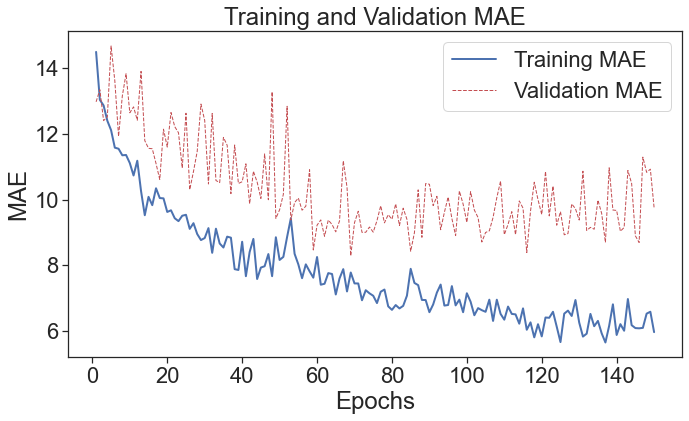

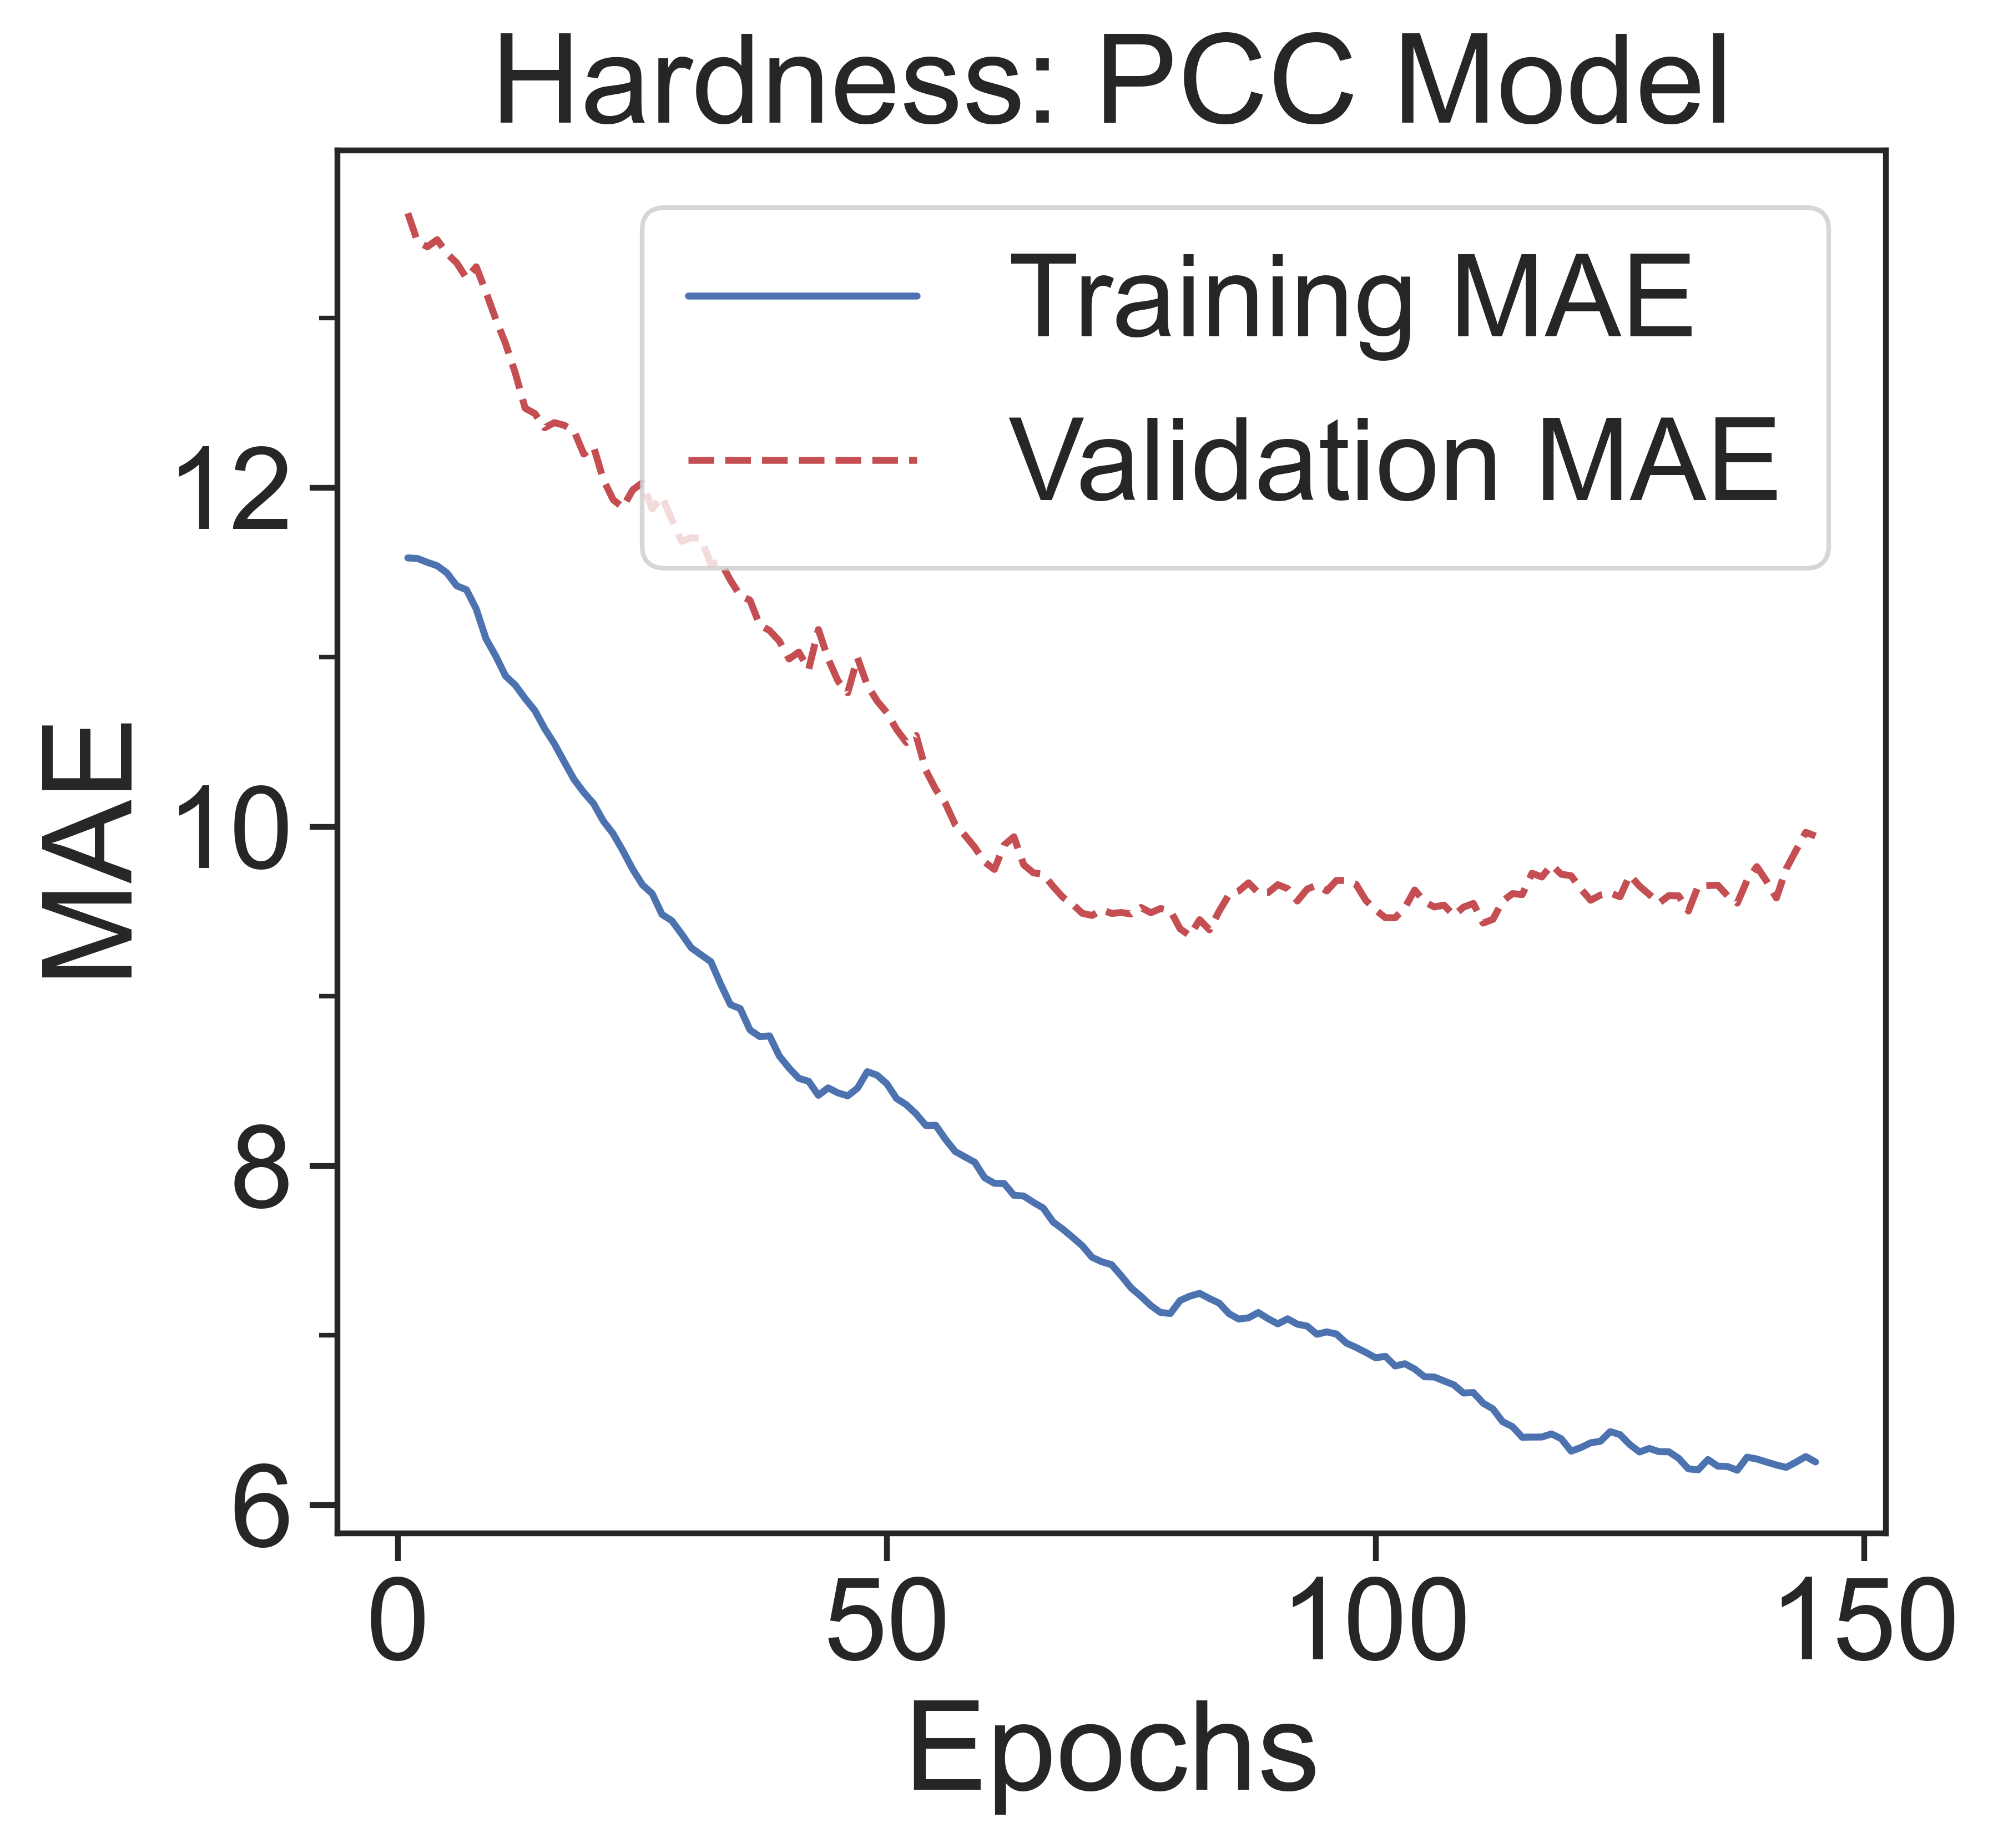

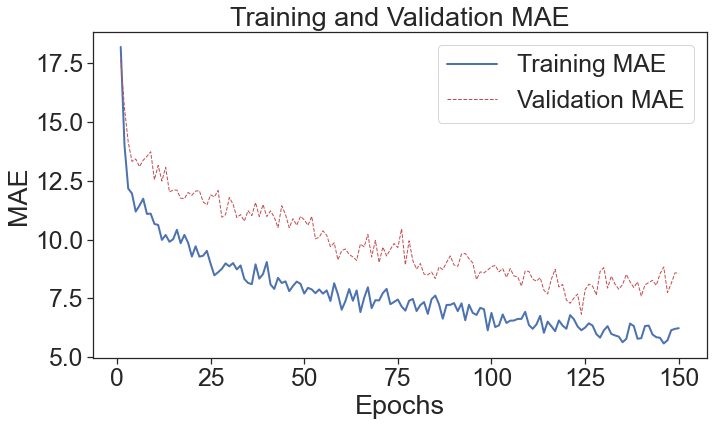

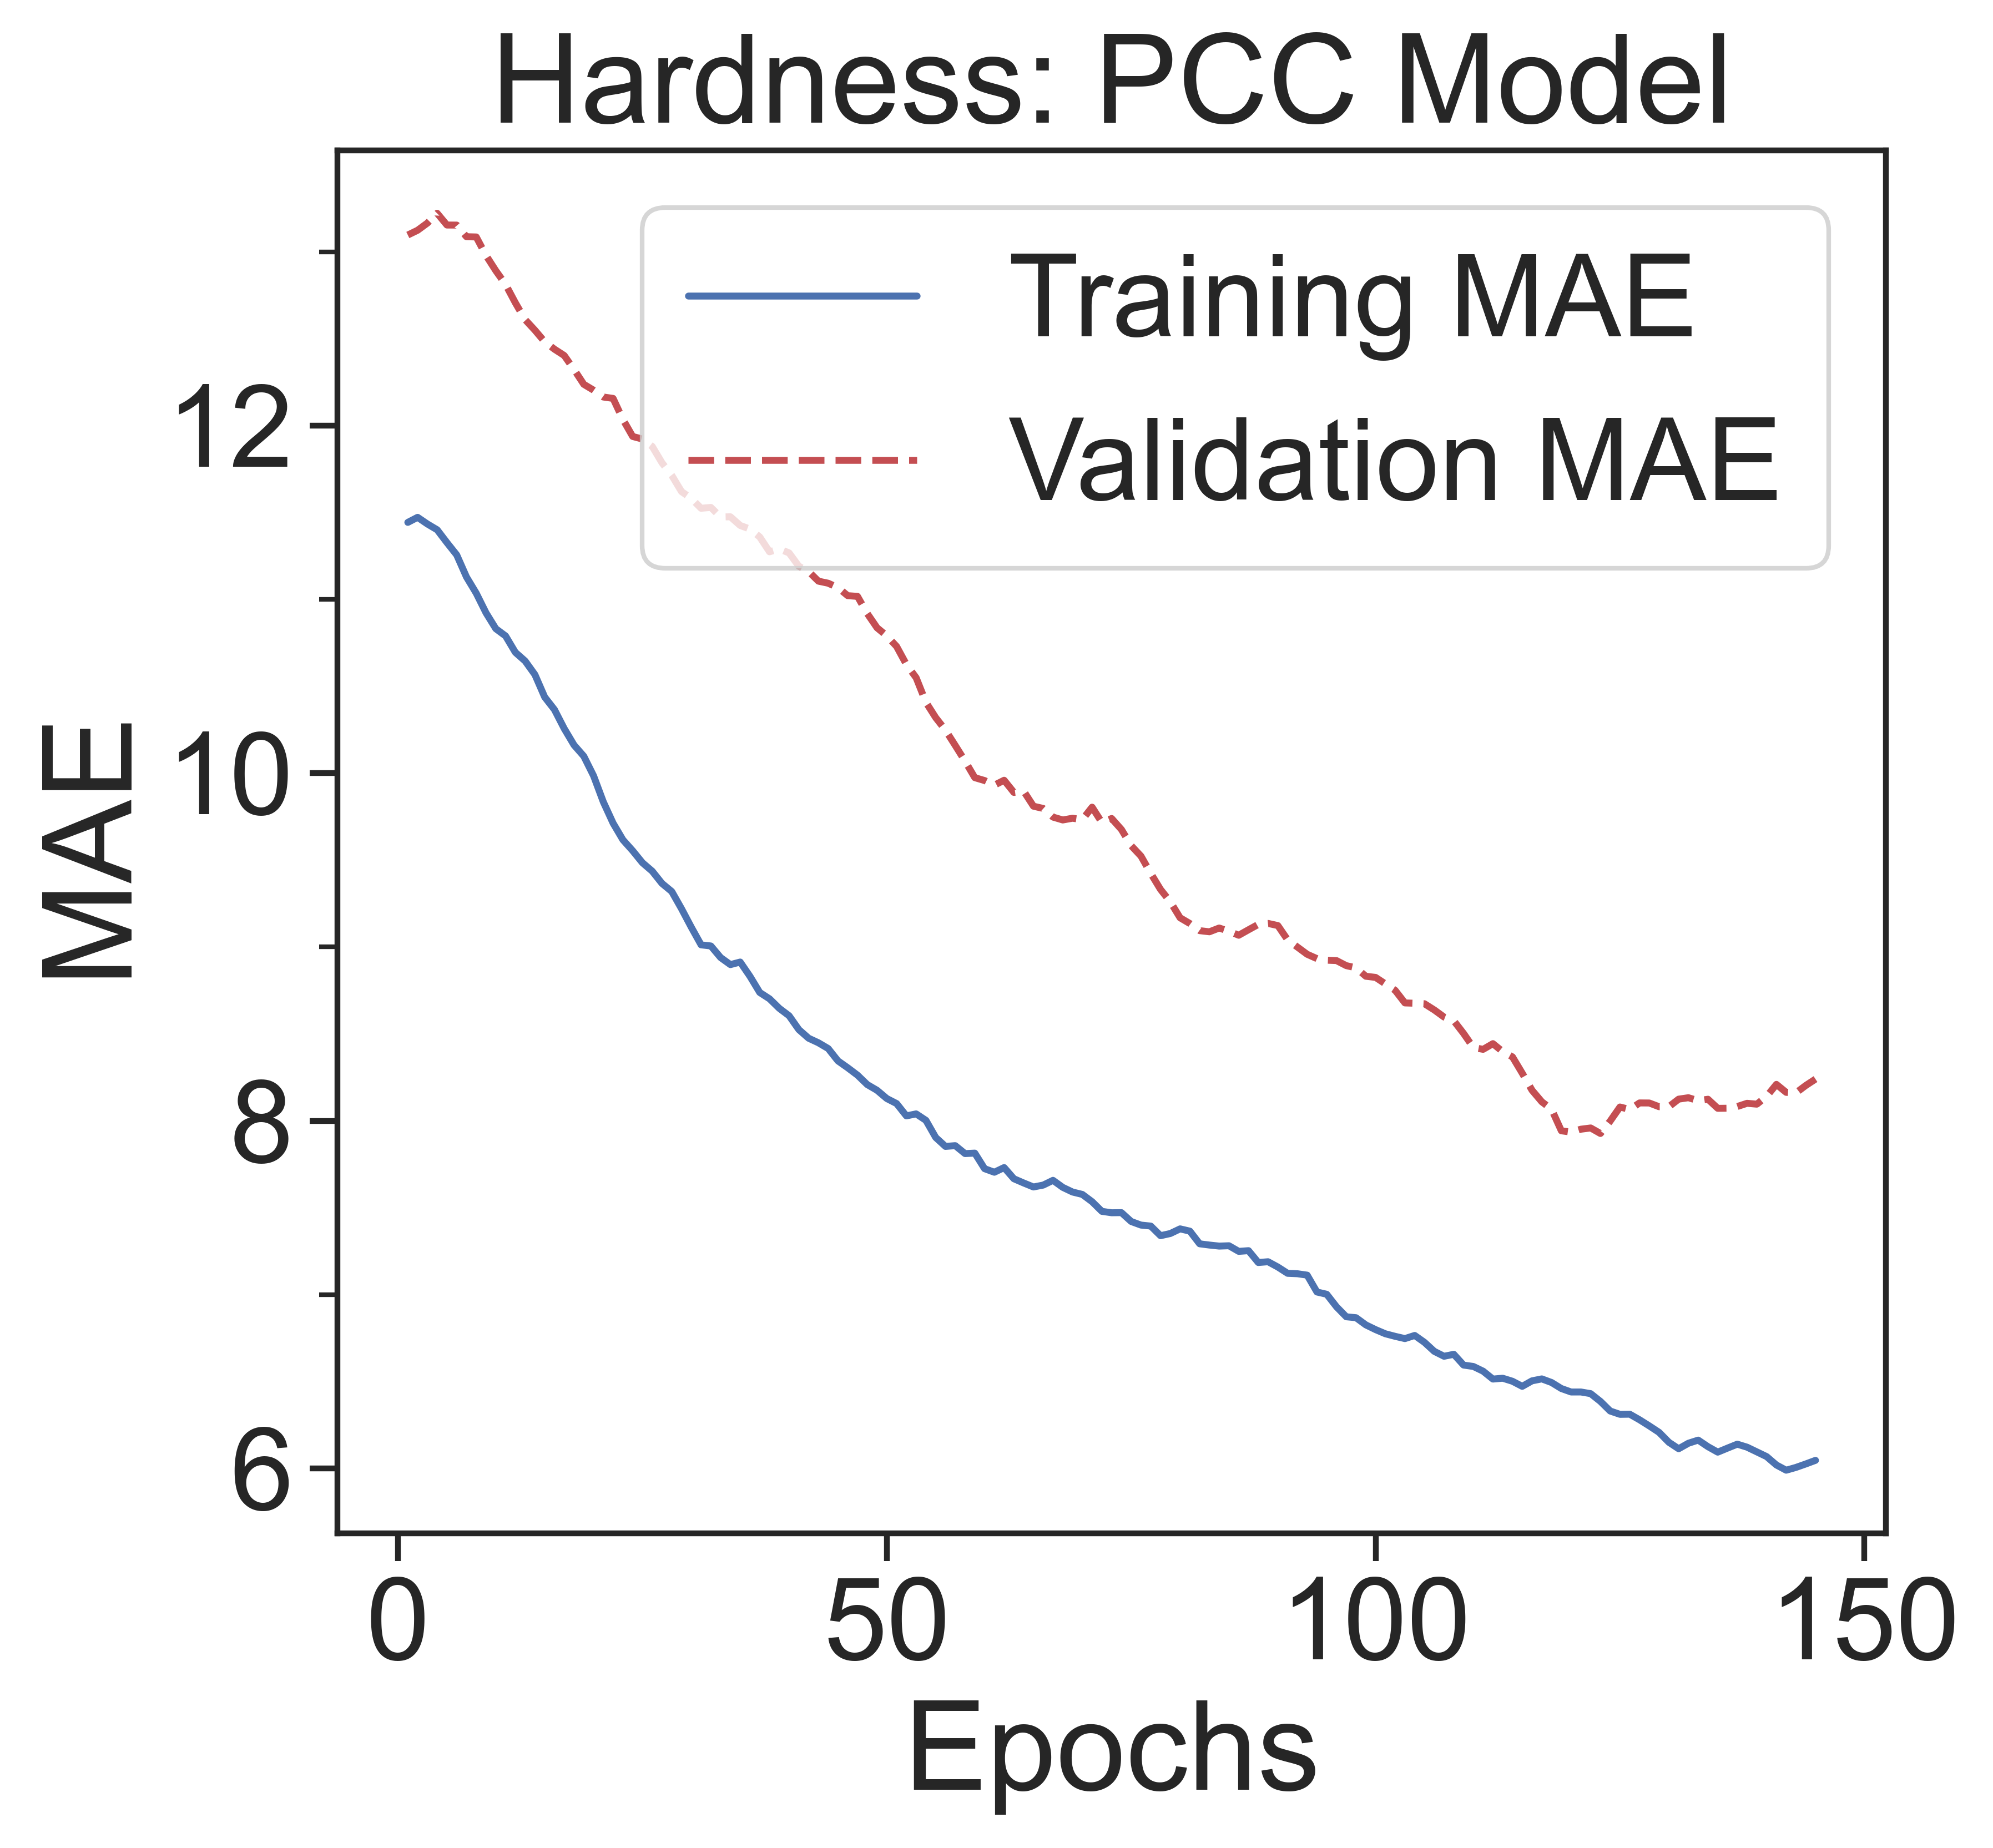

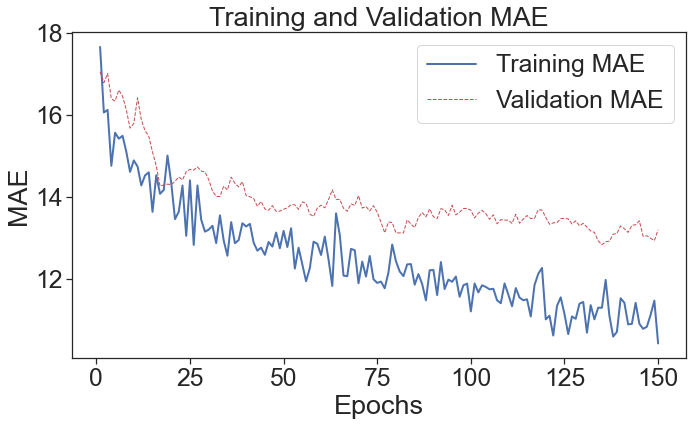

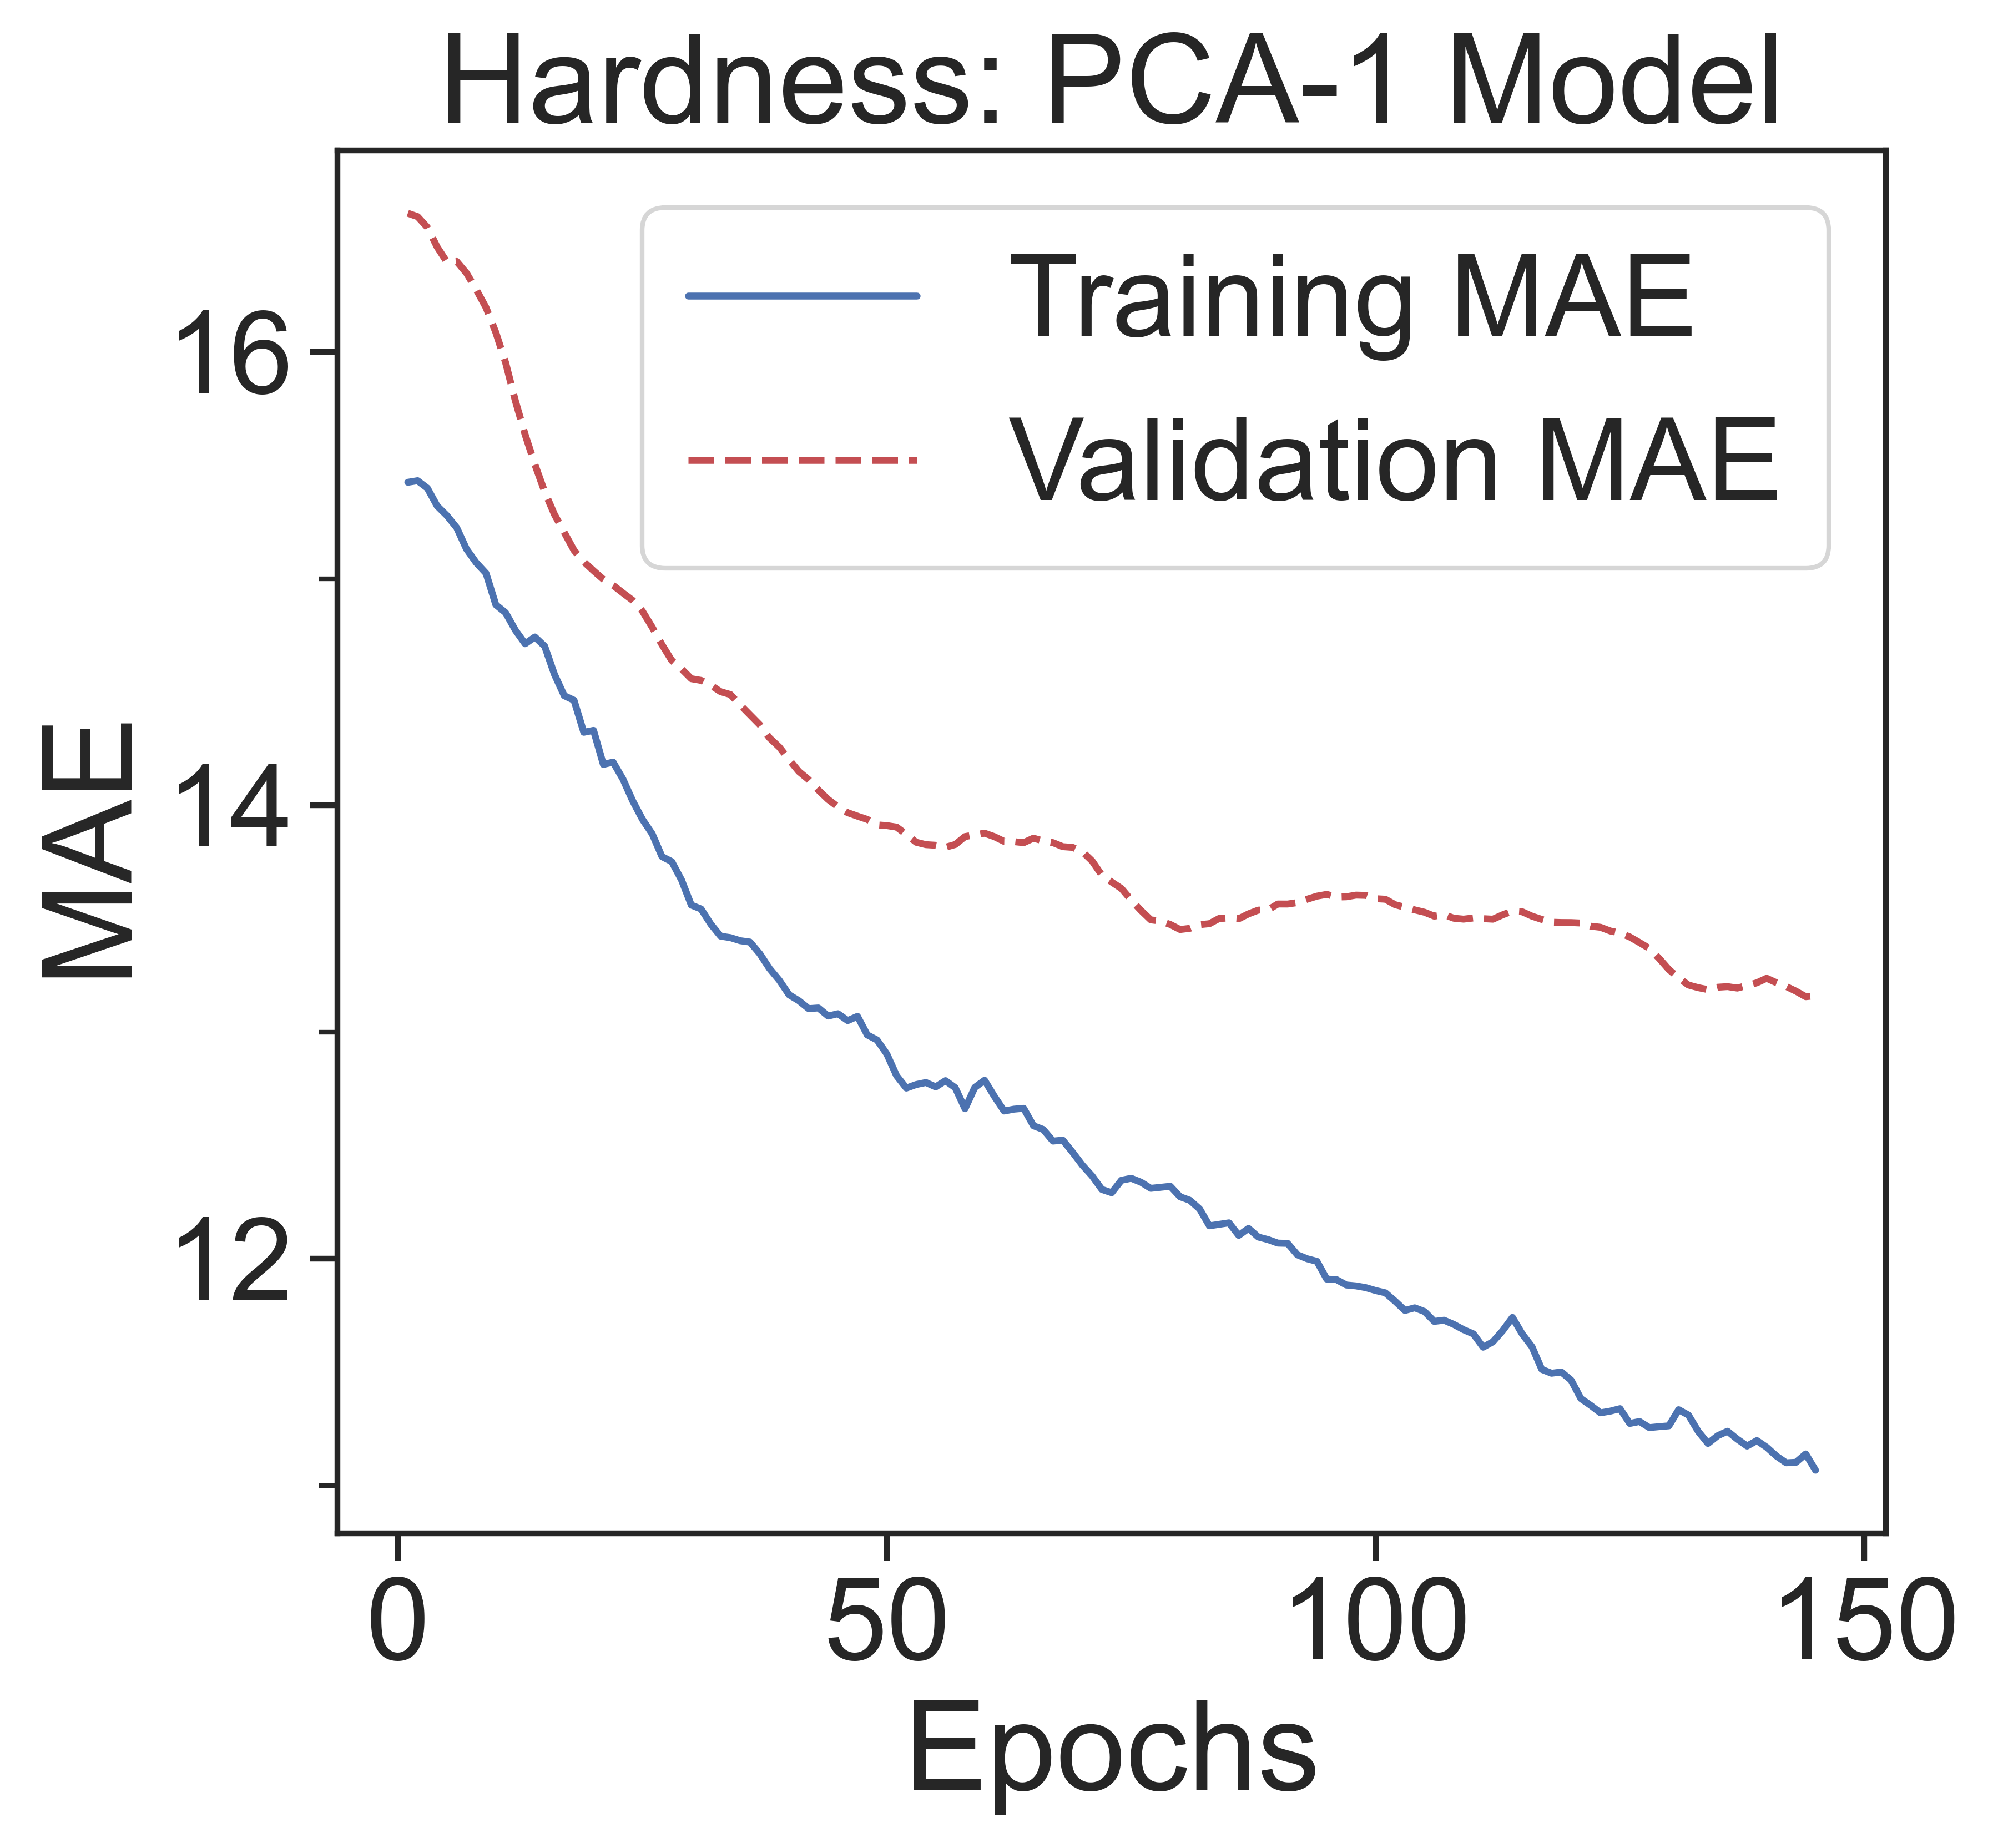

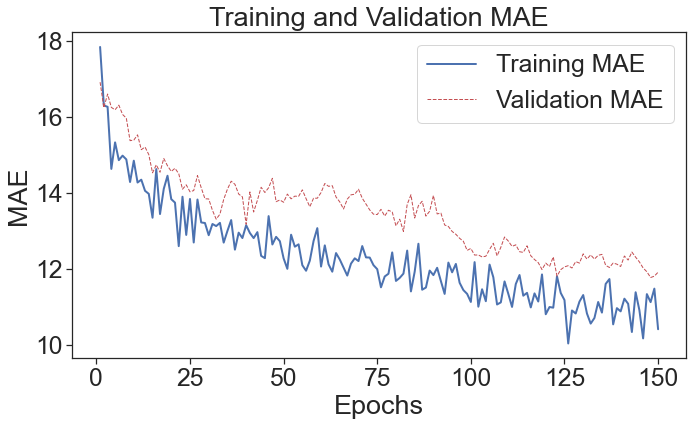

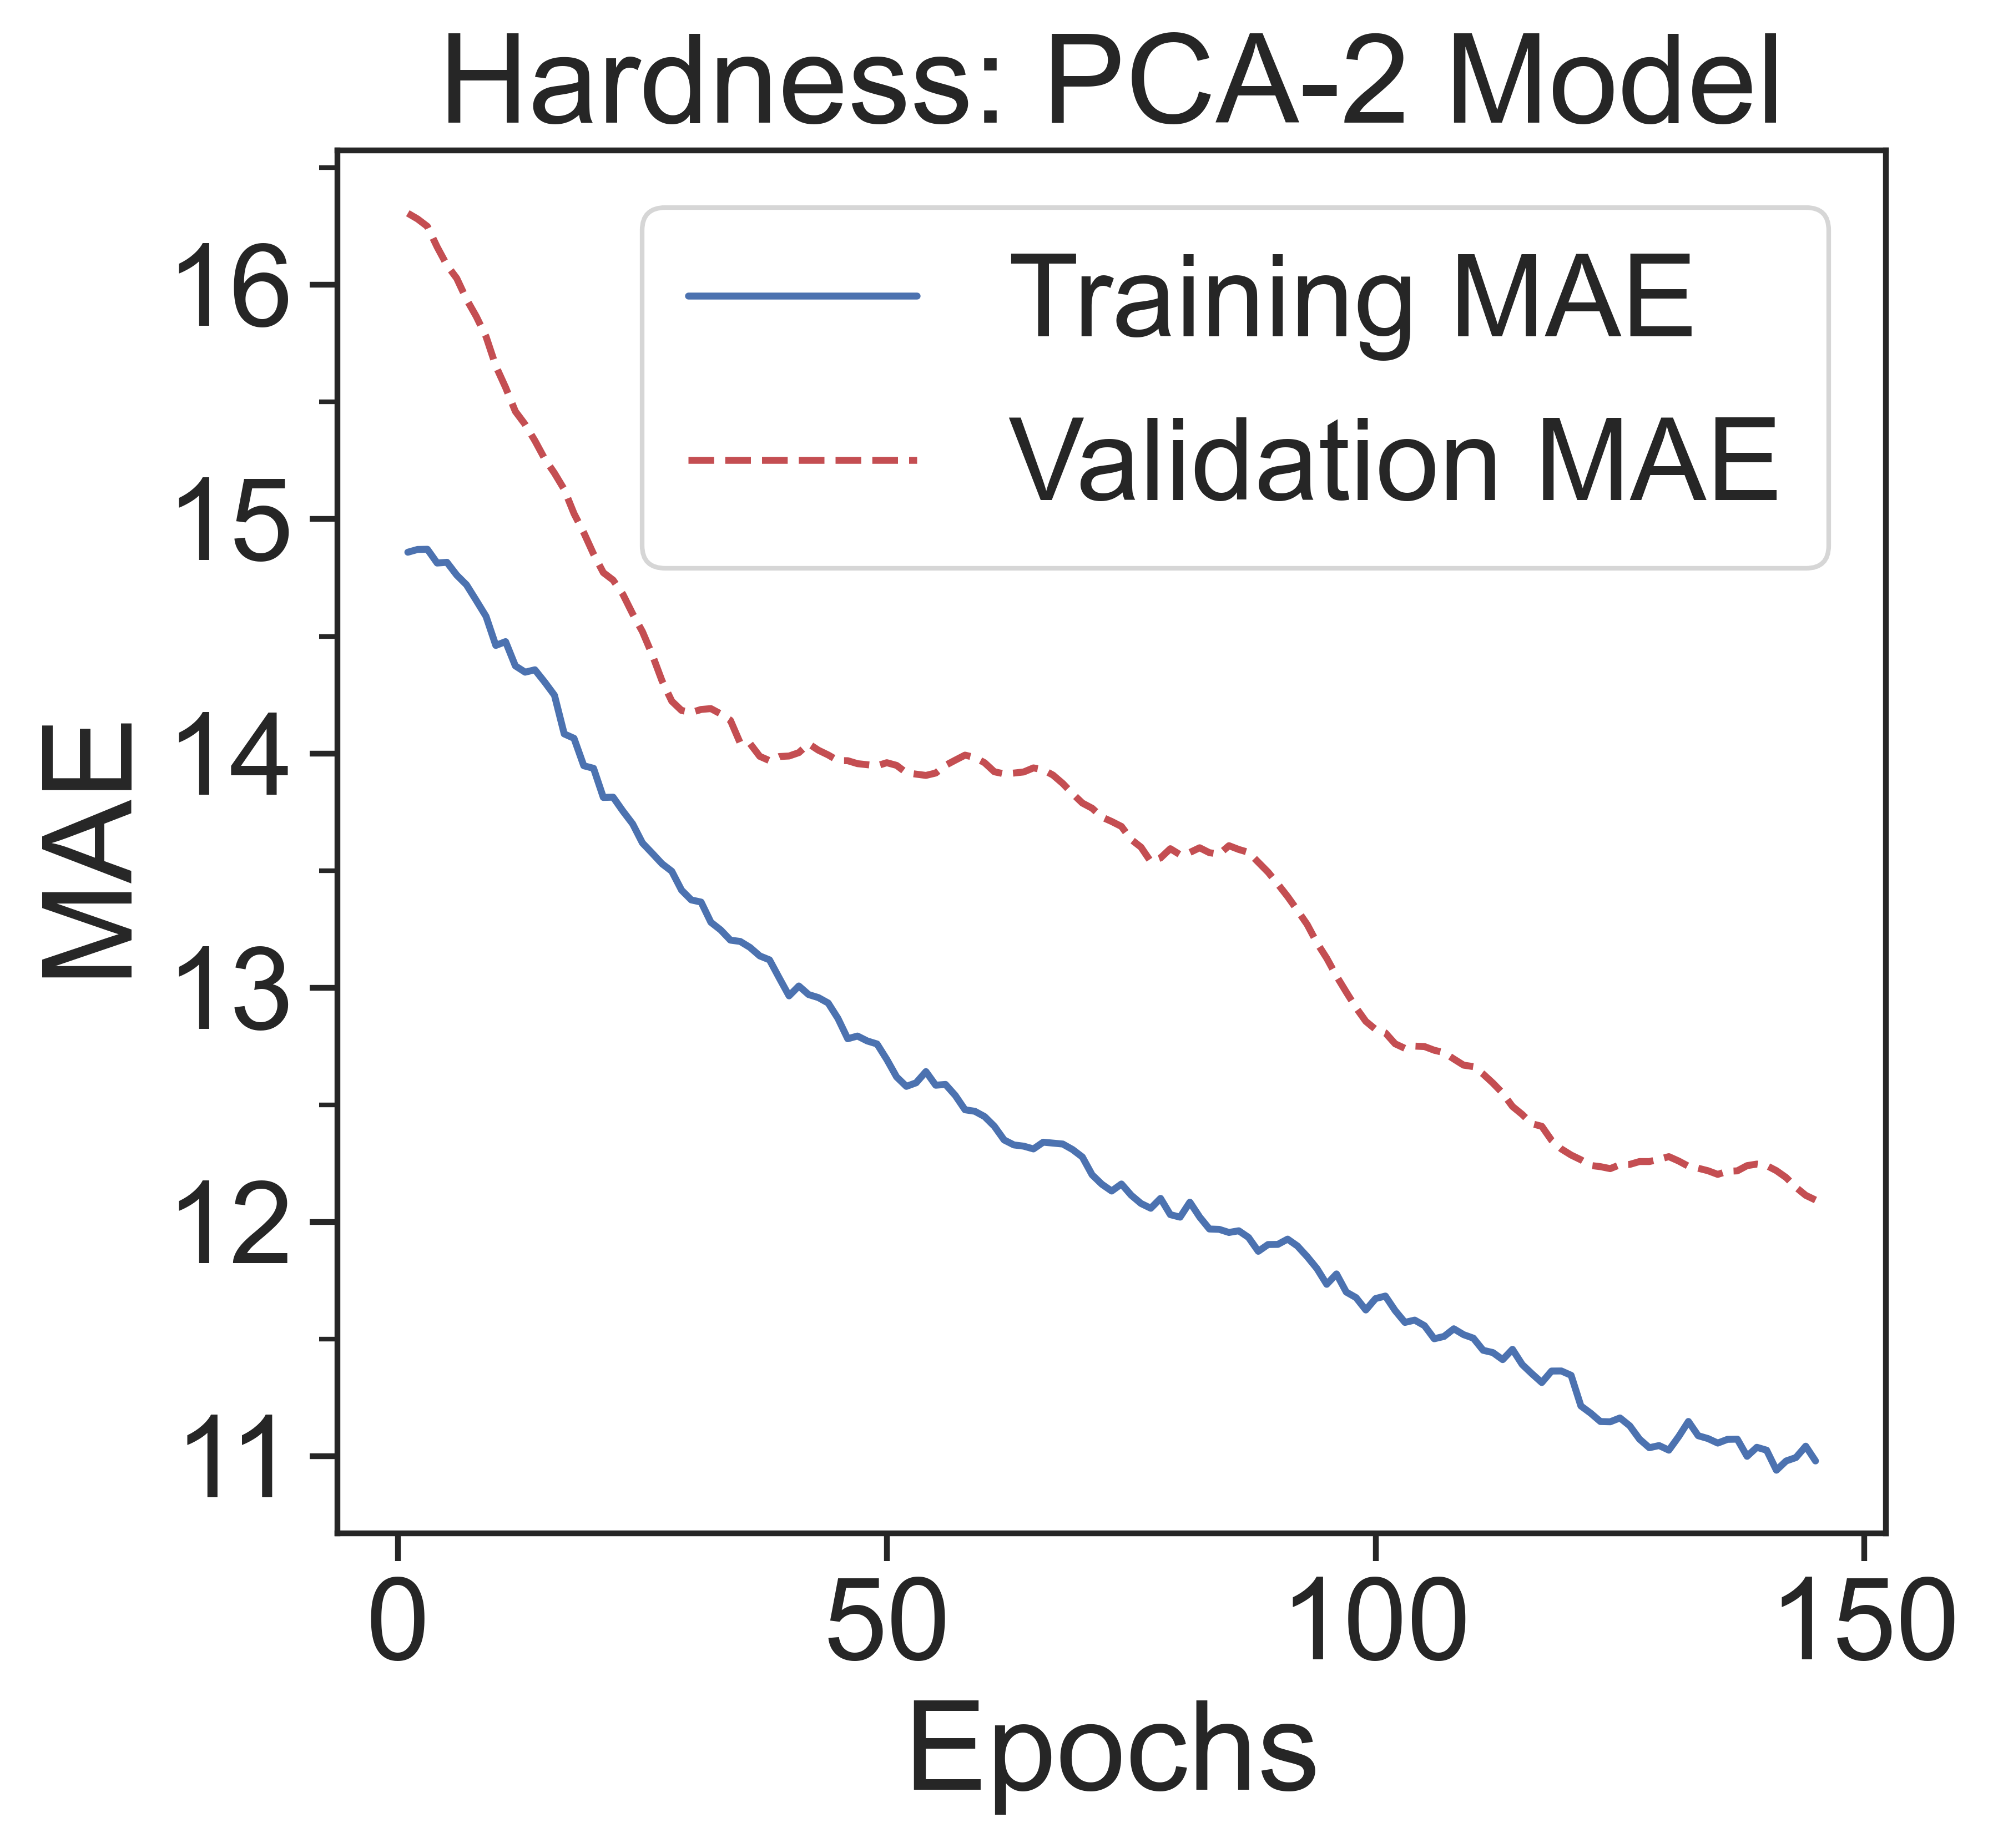

In [50]:
%run common_functions.ipynb
matrics_plot(history_pcc_1,history_pcc_1.history['mae'],history_pcc_1.history['val_mae'],"MAE","PCC Model", "Hardness",plot_path)

matrics_plot(history_pcc_2,history_pcc_2.history['mae'],history_pcc_2.history['val_mae'],"MAE","PCC Model", "Hardness",plot_path)

matrics_plot(history_pca_1,history_pca_1.history['mae'],history_pca_1.history['val_mae'],"MAE", "PCA-1 Model", "Hardness",plot_path)

matrics_plot(history_pca_2,history_pca_2.history['mae'],history_pca_2.history['val_mae'],"MAE", "PCA-2 Model", "Hardness",plot_path)

# Ensemble NN Model

## Ensemble model with "load_model", model at the end of the epochs

In [51]:
%run common_functions.ipynb
load_model_pcc_1 = load_model(path+'model_pcc_1.h5')
load_model_pcc_2 = load_model(path+'model_pcc_2.h5')
load_model_pca_1 = load_model(path+'model_pca_1.h5')
load_model_pca_2 = load_model(path+'model_pca_2.h5')

load_models = [load_model_pcc_1,load_model_pcc_2, load_model_pca_1, load_model_pca_2]

test_datasets = [test_pcc_1,test_pcc_2, test_pca_1, test_pca_2]


preds_array = ensemble_model(load_models, test_datasets,y_test)

R sq. for Model 0 0.6730859134783614
R sq. for Model 1 0.6252507097593558
R sq. for Model 2 0.4601990635955976
R sq. for Model 3 0.4022687550447014
Average: 0.6517547191061204
Max $R^2$ of  0.6766780352293593  obained with w1= 0.3  w2= 0.3  w3= 0.3  and w4= 0.1


## Running Ensemble model with the ideal weights

Results of sklearn.metrics:
MAE: 8.658776737087301
MSE: 145.6497535994718
RMSE: 12.068543971808356
MAPE: 1.3988262312878026
R-Squared: 0.672175928324173
Test R2 score:  0.672175928324173


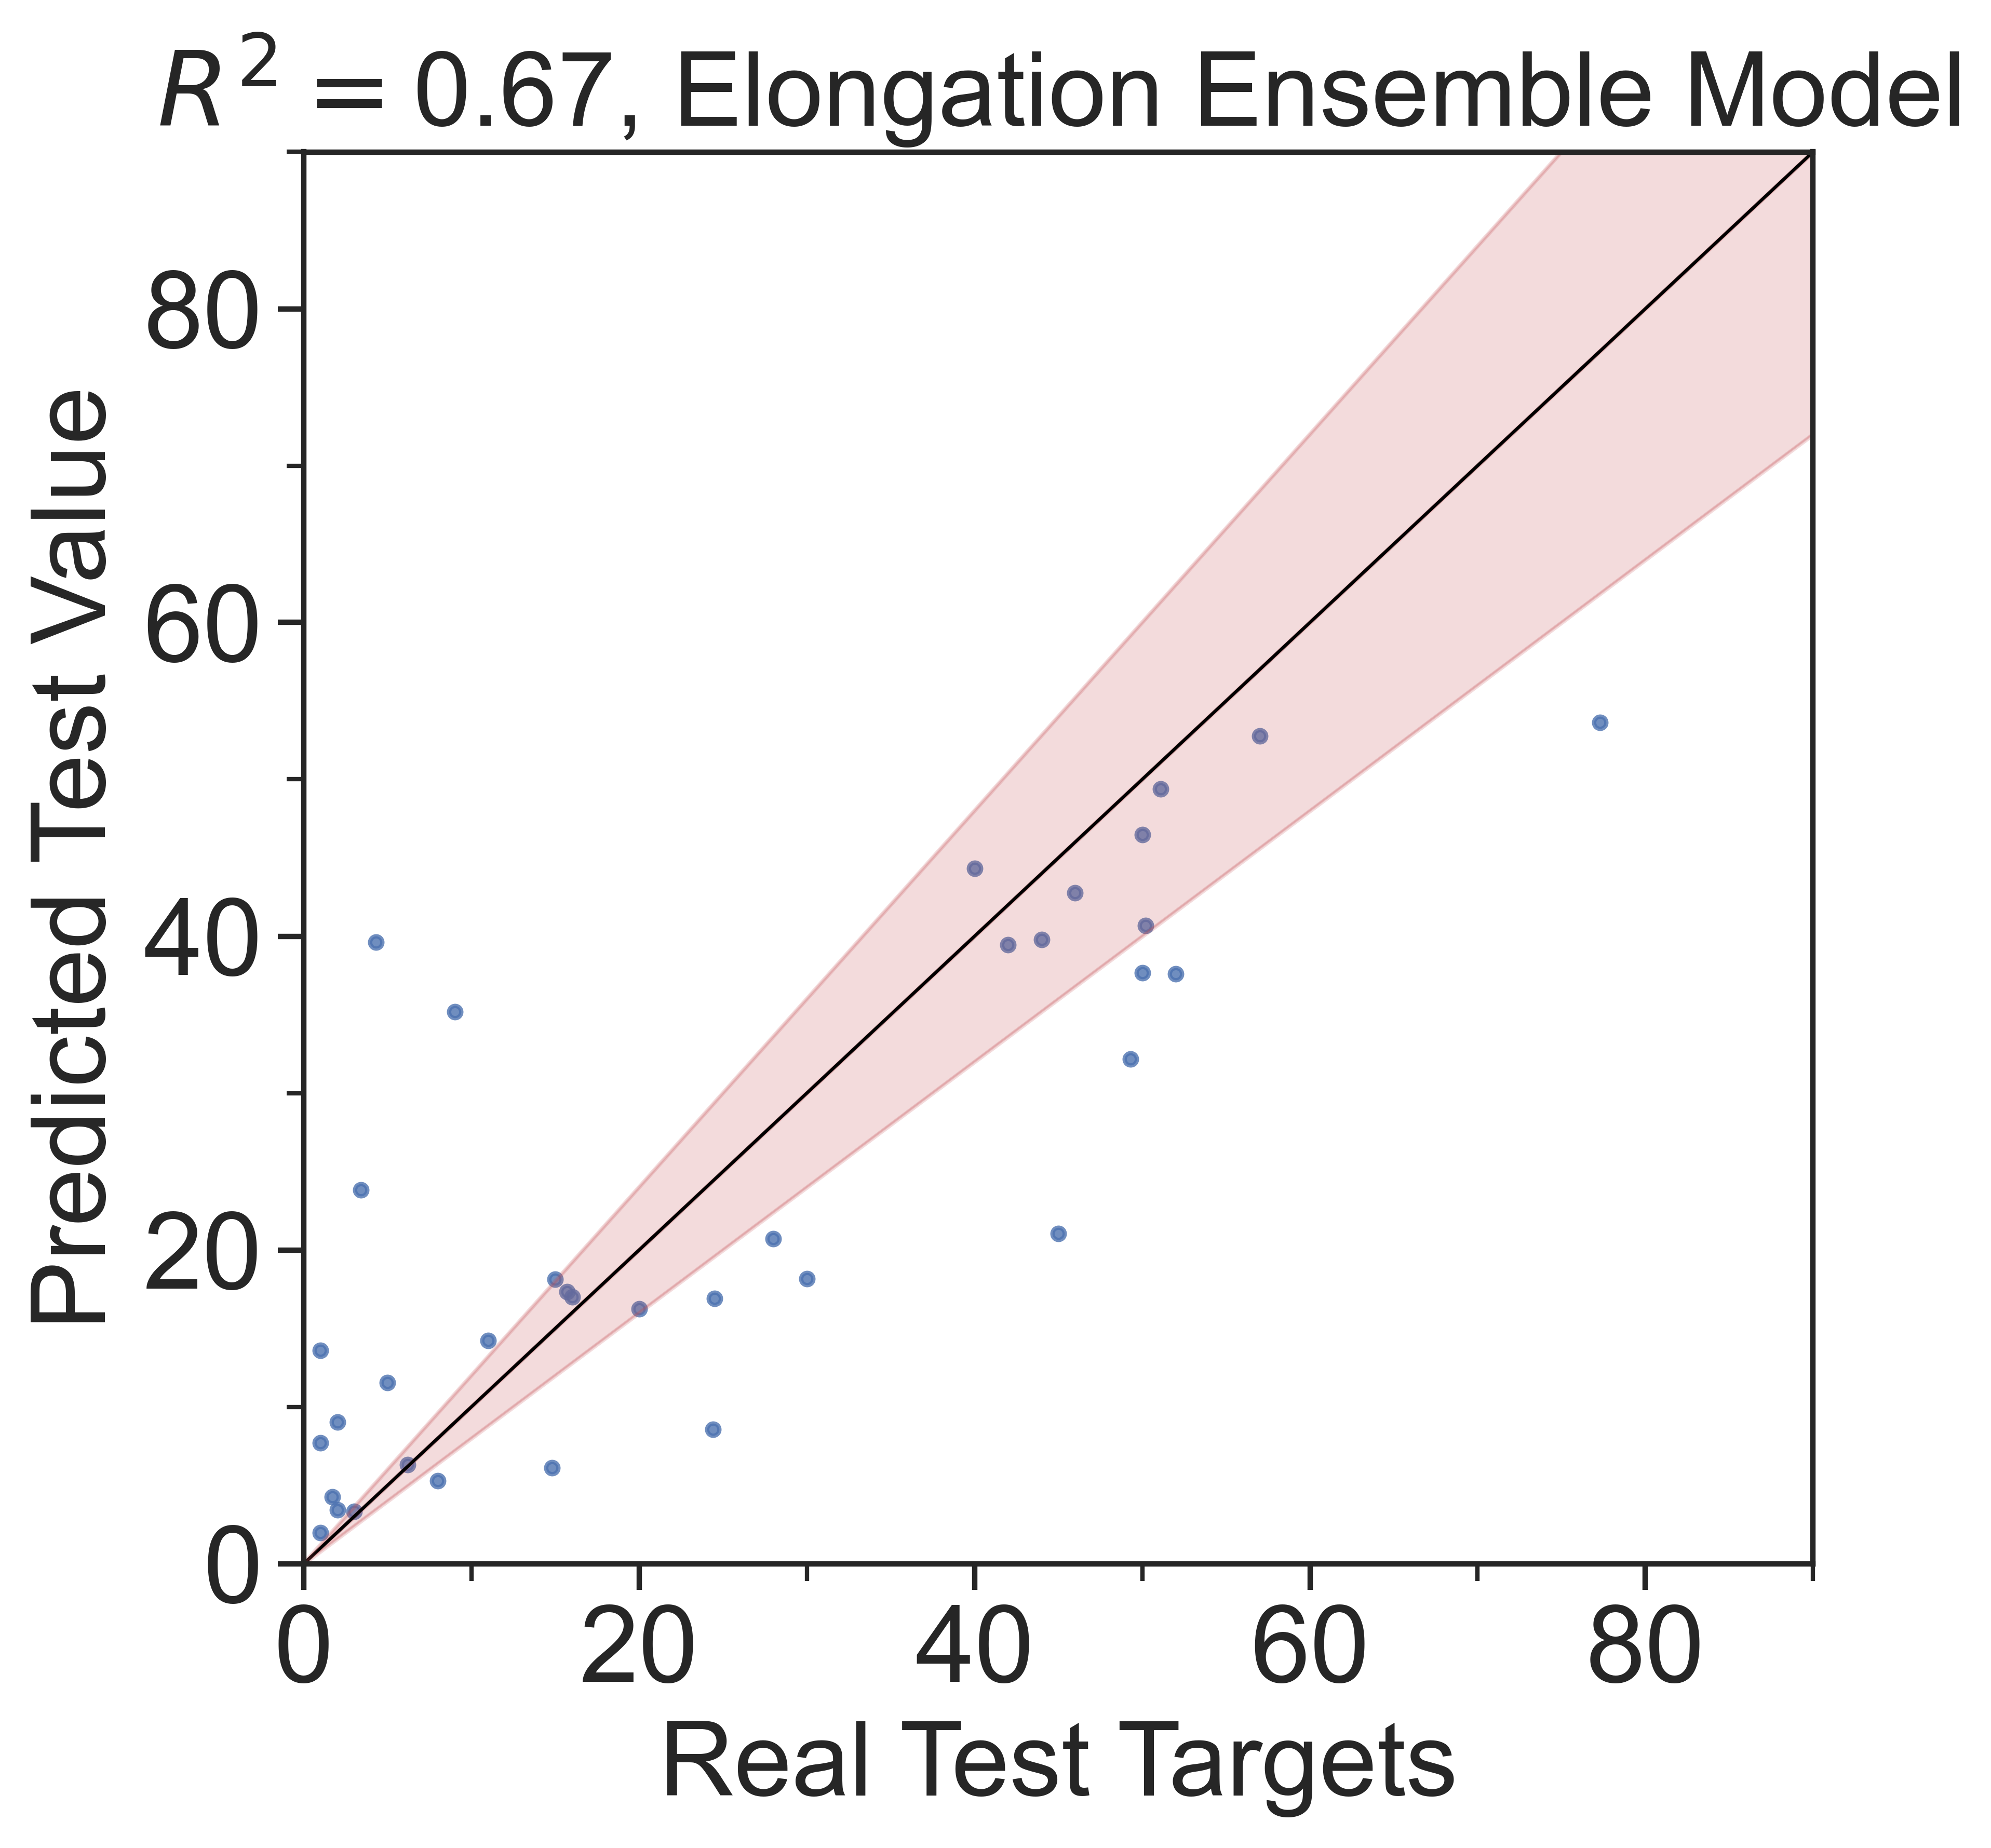

In [57]:
%run common_functions.ipynb
ideal_weights = [0.3,0.3, 0.3, 0.1] 
weighted_ensemble(preds_array, ideal_weights,y_test,plot_path="plots\\elongation\\", plot_title=", Elongation Ensemble Model",limit_value1=100,limit_value2=90,value_gap=20)

## Ensemble model with "best_model", model with best val_rmse

In [53]:
%run common_functions.ipynb
best_model_pcc_1 = load_model(path+'best_model_pcc_1.h5')
best_model_pcc_2 = load_model(path+'best_model_pcc_2.h5')
best_model_pca_1 = load_model(path+'best_model_pca_1.h5')
best_model_pca_2 = load_model(path+'best_model_pca_2.h5')

best_models = [best_model_pcc_1,best_model_pcc_2, best_model_pca_1, best_model_pca_2]

#test_datasets = [std_test_pcc_1, test_pca_1, test_pca_2]


preds_array = ensemble_model(best_models, test_datasets,y_test)

R sq. for Model 0 0.675292533839283
R sq. for Model 1 0.6570254703685185
R sq. for Model 2 0.455073258367127
R sq. for Model 3 0.4036363844497538
Average: 0.6457939553362291
Max $R^2$ of  0.672175928324173  obained with w1= 0.3  w2= 0.3  w3= 0.3  and w4= 0.1


## Running Ensemble model with the ideal weights

Results of sklearn.metrics:
MAE: 8.658776737087301
MSE: 145.6497535994718
RMSE: 12.068543971808356
MAPE: 1.3988262312878026
R-Squared: 0.672175928324173
Test R2 score:  0.672175928324173


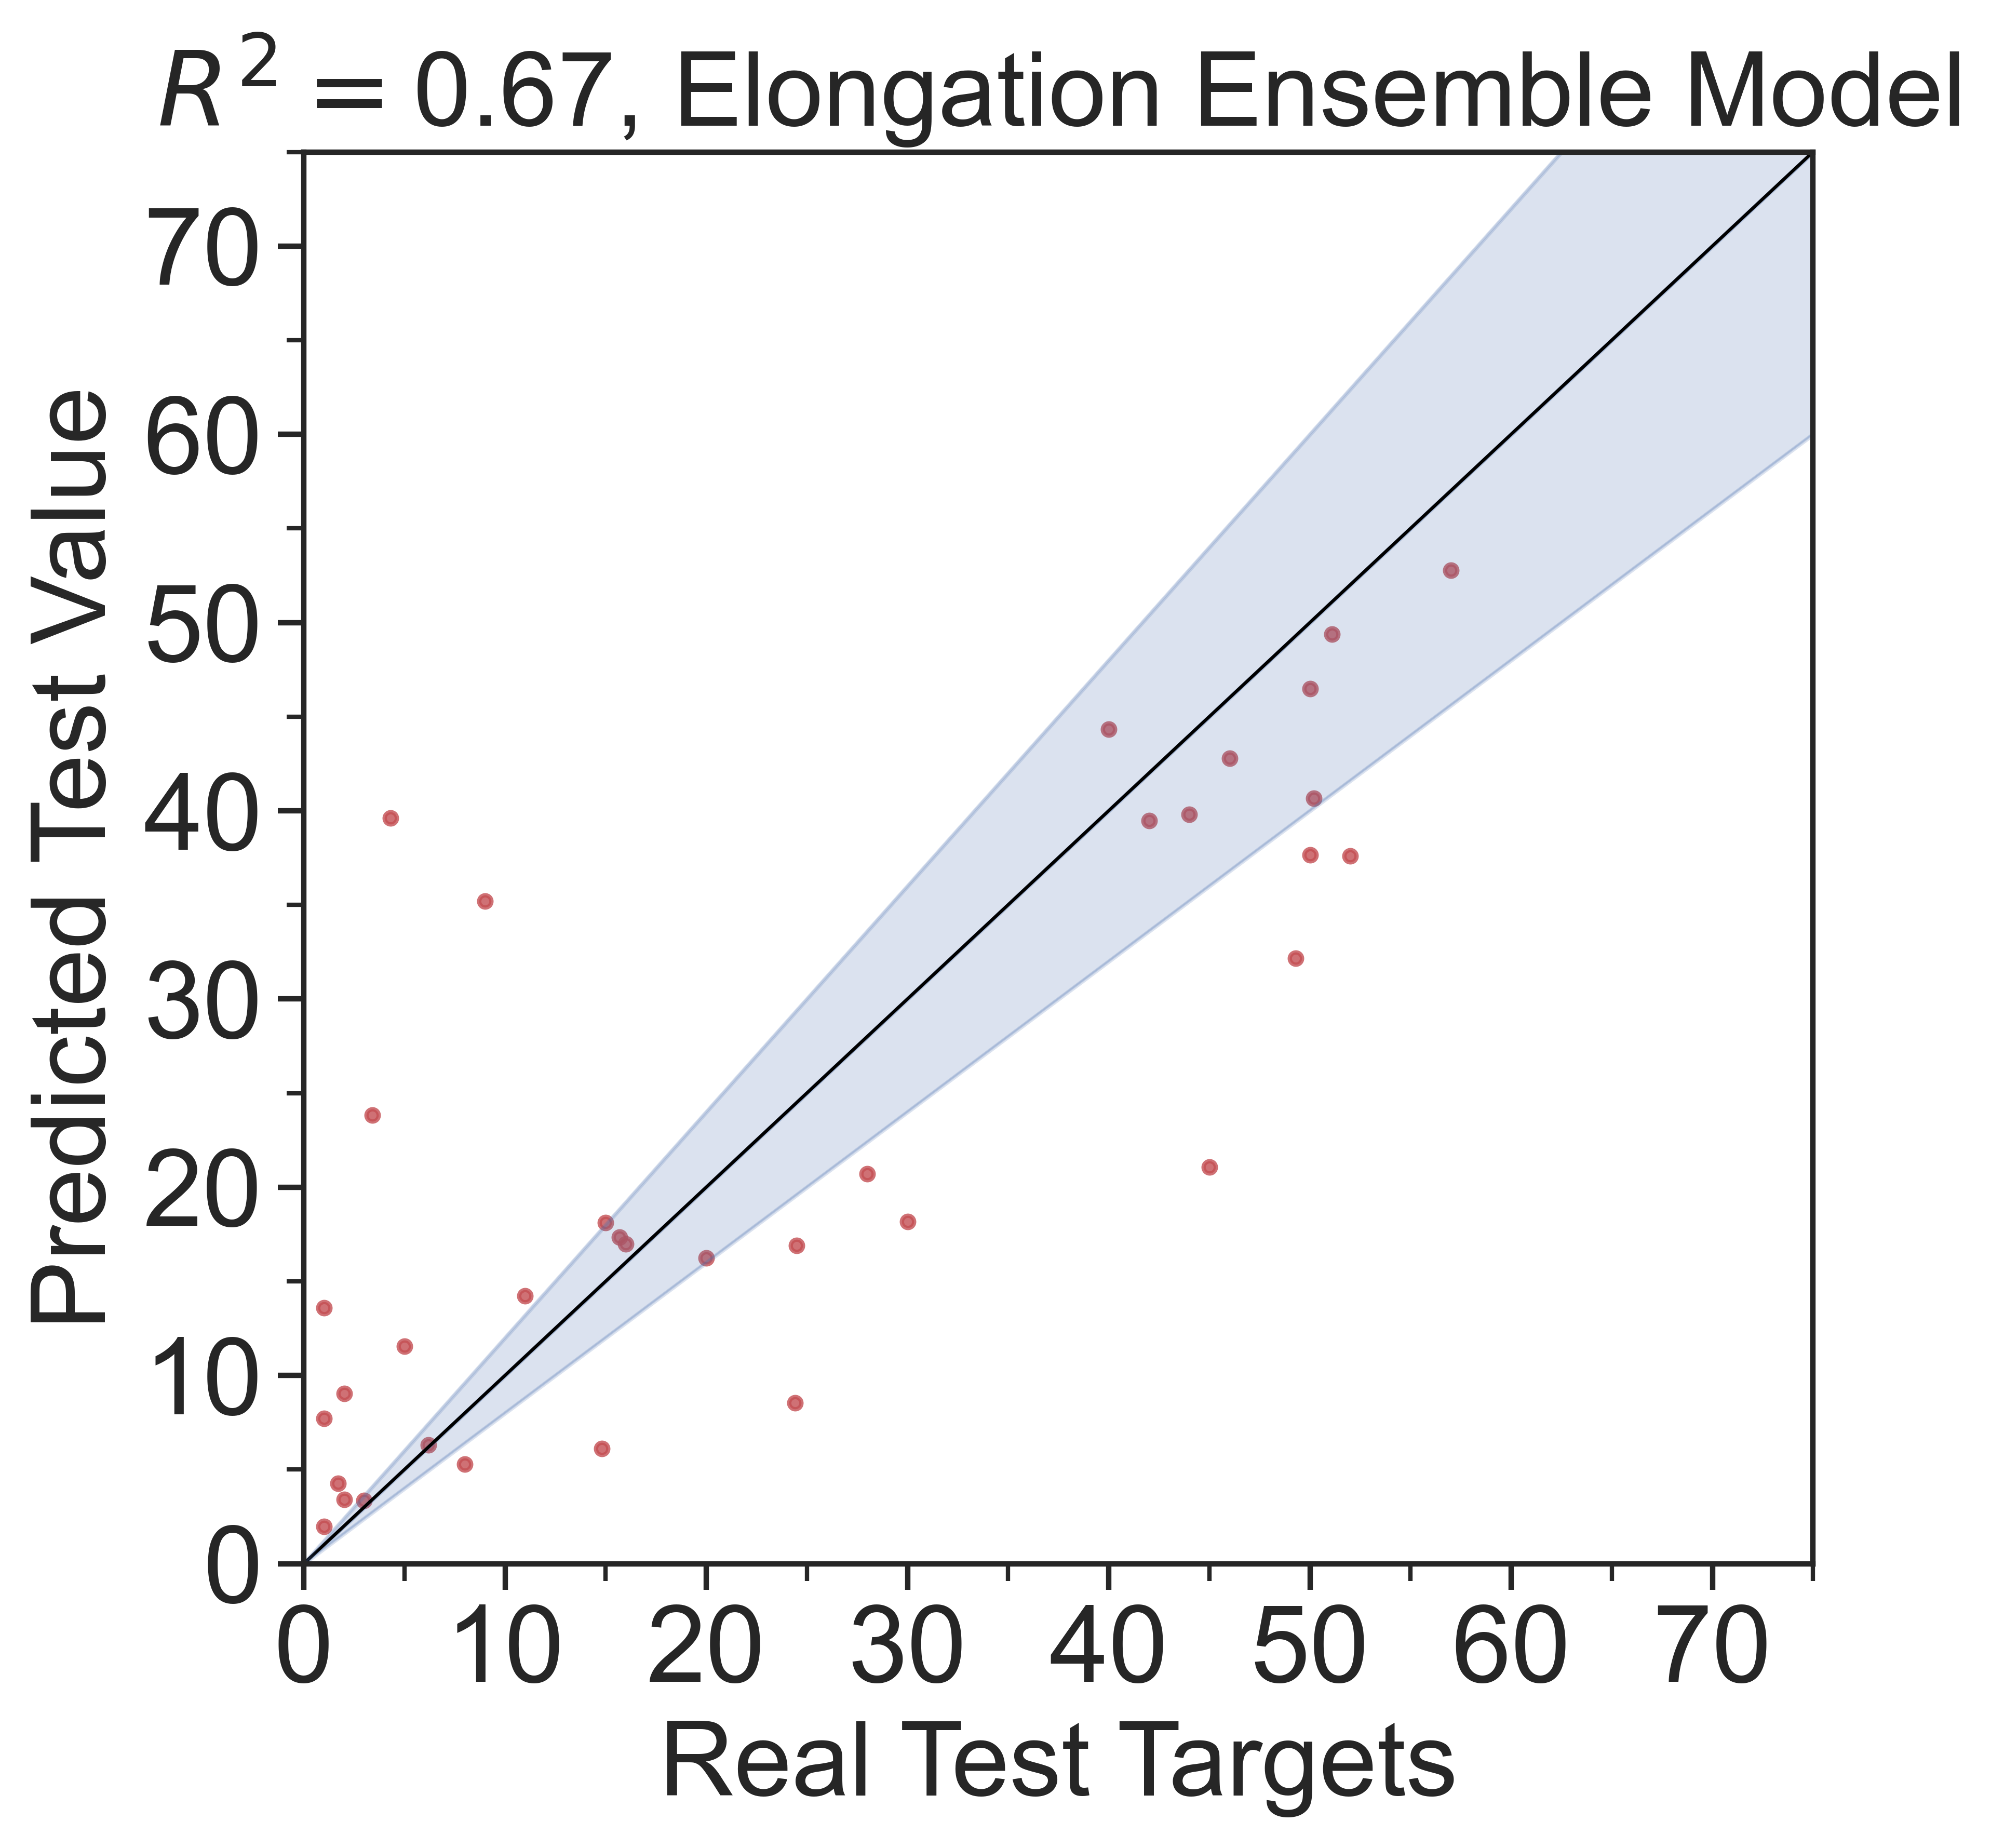

In [54]:
%run common_functions.ipynb
ideal_weights = [0.3,0.3, 0.3, 0.1] 
weighted_ensemble(preds_array, ideal_weights,y_test,plot_path="plots\\elongation\\", plot_title=", Elongation Ensemble Model",limit_value1=80,limit_value2=75,value_gap=10)